## Proje: Uçuş Rötarları ve İptallerinin Analizi

### Bu Proje 2022 Yılının  6 aylık dönemine ait 31 günlük; toplamda 29 sütuna ait toplam 111006 verileri kapsıyor.
 Genel Bulgular:
 - Veri setinin 12 farklı havayolu şirketine ait 3520 uçağın uçuşlarını göstermekte.Toplamda 1100 uçuş gerçekleşmiş.
 - Uçuşların yalnızca iki farklı kalkış noktasından başlamakta ve 97 tane varış noktasını göstermekte.
 - Genellikle, yaz aylarında (Haziran) uçuş sayılarının arttığı ve yılın başlarında (Ocak ve Şubat) daha az uçuş yapıldığı görülmekte.
 - Bazı uçuşların kalkış zamanlarında eksiklikler var.
 - Genellikle uçaklar planlanan kalkış saatlerinden biraz geç (8 dak. kadar) kalkıyor.
 - Gecikmeler değişkenlik gösteriyor(Minimum gecikme -36 dakika (erken kalkış), maksimum gecikme ise 2120 dakika (35 saat ve 20 dakikaya)'dir, bu da büyük bir gecikmeye işaret eder.)
 - Uçuşların %50'si (medyan) -2 dakikalık bir gecikmeye sahiptir, bu da uçuşların genellikle zamanında kalktığını gösterir.
 - Veri setinde farklı uzunluklarda uçuşlar var ( minimum mesafe 93 km, maksimum mesafe 2724 km'dir.). 
 - Hava durumu ile ilgili 9 değişken dikkate alınmış buda hava durumunun zaman içinde değişken olduğunu gösteriyor.

In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Gerekli Kütüphanelerin Yüklenmesi

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### Veriyi Data Frame Yükleme

In [11]:
df = pd.read_csv("C:/Users/HP/Desktop/Python_Project/Flight_data.csv", sep=",")

In [12]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [13]:
pd.set_option('display.max_columns', None)  # Tüm sütunları göster
pd.set_option('display.width', 1000)

### Veri Seti Kolonları

    year - Yıl
    month - Ay
    day - Gün
    dep_time - Kalkış Zamanı
    sched_dep_time - Planlanan Kalkış Zamanı
    dep_delay - Kalkış Gecikmesi
    arr_time - Varış Zamanı
    sched_arr_time - Planlanan Varış Zamanı
    arr_delay - Varış Gecikmesi
    carrier - Taşıyıcı
    flight - Uçuş Numarası
    tailnum - Kuyruk Numarası
    origin - Kalkış Yeri
    dest - Varış Yeri
    air_time - Havada Geçirilen Süre
    distance - Mesafe
    hour - Saat
    minute - Dakika
    airline - Havayolu
    route - Rota
    temp - Sıcaklık
    dewp - Çiğ Noktası
    humid - Nem Oranı
    wind_dir - Rüzgar Yönü
    wind_speed - Rüzgar Hızı
    wind_gust - Rüzgar Şiddeti
    precip - Yağış Miktarı
    pressure - Basınç
    visib - Görüş Mesafesi


In [14]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib'], dtype='object')

In [15]:
df_orjinal=df

In [16]:
df_orjinal.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


#### Kolon isimlerini Türkçe Yapma

In [17]:
# Sütun isimlerini Türkçe'ye çevirme
column_mapping = {
    'year': 'yıl',
    'month': 'ay',
    'day': 'gün',
    'dep_time': 'kalkış_zamanı',
    'sched_dep_time': 'planlanan_kalkış_zamanı',
    'dep_delay': 'kalkış_gecikmesi',
    'arr_time': 'varış_zamanı',
    'sched_arr_time': 'planlanan_varış_zamanı',
    'arr_delay': 'varış_gecikmesi',
    'carrier': 'havayolu_firması',
    'flight': 'uçuş',
    'tailnum': 'uçak_kuyruk_numarası',
    'origin': 'kalkış_yeri',
    'dest': 'varış_yeri',
    'air_time': 'uçuş_zamanı',
    'distance': 'mesafe',
    'hour': 'saat',
    'minute': 'dakika',
    'airline': 'havayolu',
    'route': 'rota',
    'temp': 'sıcaklık',
    'dewp': 'çiy_noktası',
    'humid': 'nem',
    'wind_dir': 'rüzgar_yönü',
    'wind_speed': 'rüzgar_hızı',
    'wind_gust': 'rüzgar_gücü',
    'precip': 'yağış',
    'pressure': 'basınç',
    'visib': 'görüş_mesafesi'
}

# Sütun isimlerini güncelleyin
df.rename(columns=column_mapping, inplace=True)

In [98]:
df.head()

,yıl,ay,gün,kalkış_zamanı,planlanan_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,planlanan_varış_zamanı,varış_gecikmesi,havayolu_firması,uçuş,uçak_kuyruk_numarası,kalkış_yeri,varış_yeri,uçuş_zamanı,mesafe,saat,dakika,havayolu,rota,sıcaklık,çiy_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_gücü,yağış,basınç,görüş_mesafesi
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [18]:
df.shape

(111006, 29)

### Veri Seti Özellikleri

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   yıl                      111006 non-null  int64  
 1   ay                       111006 non-null  int64  
 2   gün                      111006 non-null  int64  
 3   kalkış_zamanı            108566 non-null  float64
 4   planlanan_kalkış_zamanı  111006 non-null  int64  
 5   kalkış_gecikmesi         108566 non-null  float64
 6   varış_zamanı             108469 non-null  float64
 7   planlanan_varış_zamanı   111006 non-null  int64  
 8   varış_gecikmesi          108332 non-null  float64
 9   havayolu_firması         111006 non-null  object 
 10  uçuş                     111006 non-null  int64  
 11  uçak_kuyruk_numarası     110877 non-null  object 
 12  kalkış_yeri              111006 non-null  object 
 13  varış_yeri               111006 non-null  object 
 14  uçuş

### Veri Setinin Genel Özeti

In [20]:
# Sütun bilgilerini toplama
summary_data = {
    'Benzersiz Değer Sayısı': df.nunique(),
    'En Sık Karşılaşılan Değer': df.apply(lambda x: x.mode()[0] if not x.dropna().empty else None),
    'En Sık Değerin Frekansı': df.apply(lambda x: x.value_counts().iloc[0] if not x.dropna().empty else None)
}

# Özet DataFrame oluşturma
summary_df = pd.DataFrame(summary_data)

# Sonucu göster
print(summary_df)

                         Benzersiz Değer Sayısı En Sık Karşılaşılan Değer  En Sık Değerin Frekansı
yıl                                           1                      2022                   111006
ay                                            6                         6                    20491
gün                                          31                        24                     3860
kalkış_zamanı                              1316                     556.0                      282
planlanan_kalkış_zamanı                     885                       600                     2744
kalkış_gecikmesi                            500                      -4.0                     8826
varış_zamanı                               1422                    2349.0                      212
planlanan_varış_zamanı                     1171                      2359                     1838
varış_gecikmesi                             521                      -8.0                     3424
havayolu_f

Zamana Bağlı Veriler: Veri setinde yıl, ay, gün, saat, ve dakika gibi zaman dilimlerine ait detaylar mevcut. Özellikle yıl sütunu 2022 için tek bir değer gösteriyor, bu da veri setinin yalnızca 2022 yılına ait olduğunu belirtiyor.

    Operasyonel Detaylar:
        Kalkış ve Varış Zamanları: kalkış_zamanı ve varış_zamanı çeşitliliği yüksek, bu da farklı uçuş zamanlarının olduğunu gösteriyor. En yaygın kalkış zamanı 2359 (gece yarısı yakın), bu da gece geç saatlerde yoğun bir uçuş trafiği olduğunu işaret edebilir.
        Gecikmeler: kalkış_gecikmesi ve varış_gecikmesi genellikle negatif (-2 ve -5 dakika), bu da uçuşların çoğunlukla erken gerçekleştiğini gösterir.

    Havayolu ve Rotalar:
        Havayolu Firması ve Uçuşlar: havayolu_firması sütunu 12 benzersiz değer içeriyor, en sık görülen havayolu AS (Alaska Airlines). Bu, Alaska Airlines'ın veri setinde dominant bir havayolu olduğunu gösterir.
        Rota: rota sütunu, uçuşların gerçekleştiği güzergahları gösterir. En sık rota SEA-PDX (Seattle'dan Portland'a), bu da popüler bir iç hat rotası olduğunu işaret eder.
        Çevresel Faktörler

    Hava Durumu: Sıcaklık, çiy noktası, nem, rüzgar yönü, rüzgar hızı ve basınç gibi çevresel faktörler, uçuş operasyonlarını etkileyebilir. Özellikle rüzgar hızı ve rüzgar gücü sütunları, uçuş sırasında rüzgarın ne kadar güçlü olduğunu gösterir. Rüzgar yönü en sık 0.0 (muhtemelen Kuzey) olarak kaydedilmiş.

    Yağış ve Görüş Mesafesi:
        Yağış: En sık görülen değer 0.0, yani çoğu zaman yağış olmamış. Ancak, yağışlı günlerin uçuş üzerindeki etkileri ayrıca incelenebilir.
        Görüş Mesafesi: En yaygın görüş mesafesi 10 kilometre, bu genellikle iyi hava koşullarını gösterir.

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yıl,111006.0,2022.000000,0.000000,2022.00,2022.000000,2022.000000,2022.000000,2022.000000
ay,111006.0,3.623264,1.713287,1.00,2.000000,4.000000,5.000000,6.000000
gün,111006.0,15.736654,8.723487,1.00,8.000000,16.000000,23.000000,31.000000
kalkış_zamanı,108566.0,1336.449487,540.664793,1.00,912.000000,1309.000000,1800.000000,2400.000000
planlanan_kalkış_zamanı,111006.0,1342.068158,530.610560,2.00,910.000000,1305.000000,1800.000000,2359.000000
kalkış_gecikmesi,108566.0,8.038456,41.687738,-36.00,-5.000000,-2.000000,6.000000,2120.000000
varış_zamanı,108469.0,1467.243636,570.938019,1.00,1055.000000,1520.000000,1917.000000,2400.000000
planlanan_varış_zamanı,111006.0,1506.330090,546.796862,3.00,1115.000000,1540.000000,1937.000000,2359.000000
varış_gecikmesi,108332.0,2.359524,43.088734,-65.00,-14.000000,-5.000000,6.000000,2098.000000
uçuş,111006.0,433.663856,267.779635,1.00,210.000000,416.000000,644.000000,1100.000000


Genel Bilgiler

    Veri Seti Boyutu: 'count' değerleri, her sütundaki geçerli veri sayısını gösterir. Çoğu sütun için 111,006 adet veri mevcut. Ancak, bazı sütunlarda eksik değerler olduğu (örneğin, kalkış_gecikmesi ve varış_gecikmesi için 108,566 ve 108,332 veri) gözlemlenmektedir, bu da bazı girişlerin eksik olduğunu işaret eder.

Zamanla İlgili Bilgiler

    Kalkış ve Varış Gecikmeleri:
        Minimum değerler (kalkış_gecikmesi için -36 dakika ve varış_gecikmesi için -65 dakika), bazı uçuşların planlanandan daha erken gerçekleştiğini gösterir.
        Maksimum değerler (kalkış_gecikmesi için 2120 dakika ve varış_gecikmesi için 2098 dakika), bazı uçuşların büyük gecikmeler yaşadığını gösterir. Bu, hava yolu şirketleri için operasyonel sorunlara işaret edebilir ve daha derinlemesine analiz gerektirebilir.

Uçuş Özellikleri

    Uçuş Zamanı ve Mesafe:
        Uçuş zamanının ve mesafenin ortalama değerleri (sırasıyla 136 dakika ve 1068 km), tipik bir uçuşun süresi ve uzunluğu hakkında bilgi verir.
        Uçuş zamanı ve mesafe arasında doğrudan bir ilişki olması beklenir: Mesafe arttıkça uçuş süresi de genellikle artar.

Çevresel Koşullar

    Sıcaklık, Çiy Noktası ve Nem:
        Bu değerler, uçuşların gerçekleştiği çevresel koşulları yansıtır. Örneğin, ortalama sıcaklık 48°C civarında iken, çiy noktası ve nem oranı da hava durumu ve uçuş koşulları üzerinde etkili olabilir.

Rüzgar ve Görüş

    Rüzgar Hızı ve Yönü:
        Rüzgarın yönü ve hızı, özellikle kalkış ve iniş sırasında uçuş güvenliği açısından kritik öneme sahiptir. Rüzgar hızının maksimum 27.6 km/saate ulaşması, bazı uçuşlarda zorlayıcı koşullar olabileceğini gösterir.
        Görüş mesafesi, maksimum değeri 10 km ile sınırlı olup, genellikle iyi görüş koşullarını işaret eder.

In [22]:
# Kombinasyonların sıklığını sayma
date_counts = df[["yıl", "ay", "gün"]].value_counts().reset_index()

# Kolon isimlerini anlamlı hale getirme
date_counts.columns = ["yıl", "ay", "gün", "count"]

# Sonuçları yazdırma
print(date_counts)

      yıl  ay  gün  count
0    2022   6   23    722
1    2022   6   24    720
2    2022   6   17    720
3    2022   6   30    716
4    2022   6    9    716
..    ...  ..  ...    ...
176  2022   2   12    501
177  2022   1   29    499
178  2022   1   22    499
179  2022   1   15    488
180  2022   4    5    470

[181 rows x 4 columns]


Bu tablo, 2022 yılının çeşitli günlerindeki uçuş verilerinin dağılımını gösteriyor. Her bir satır, belirli bir yıl, ay ve gün için kaç adet veri olduğunu belirtir. Bu bilgiyi yorumlarken dikkate alınması gereken bazı noktalar şunlardır:

    En Yüksek ve En Düşük Günler:
        2022 yılının en yoğun günü, 23 Haziran, en düşük günü ise 5 Nisan olmuştur. Bu, o günlerde yapılan uçuşların sayısının değişebileceğini gösterir.
    Trendler:
        Genellikle, yaz aylarında (Haziran) uçuş sayılarının arttığı ve yılın başlarında (Ocak ve Şubat) daha az uçuş yapıldığı görülmektedir. Bu, tatil sezonları ve mevsimsel seyahat alışkanlıkları ile ilgili olabilir.
    Uçuş Sayılarının Değişkenliği:
        Uçuş sayıları belirli günlerde değişiklik gösteriyor. Bu değişiklikler, operasyonel faktörler, mevsimsel talep ve diğer değişkenlerden etkilenebilir. Bu, hava yolu şirketleri için planlama ve kapasite yönetimi konusunda önemli bir bilgi olabilir.
    Operasyonel Planlama:
        Yoğun uçuş günleri için, hava yolu şirketleri daha fazla kaynak planlaması yapmalı ve operasyonel sorunları en aza indirmek için ek önlemler almalıdır. Benzer şekilde, daha az yoğun günlerde operasyonları optimize ederek maliyet tasarrufu sağlanabilir.

In [23]:
df.replace("", np.nan, inplace=True)
df.replace(["None", "NA", "undefined"], np.nan, inplace=True)

In [24]:
df_copy1=df

In [25]:
df_copy1.isna().sum()

yıl                           0
ay                            0
gün                           0
kalkış_zamanı              2440
planlanan_kalkış_zamanı       0
kalkış_gecikmesi           2440
varış_zamanı               2537
planlanan_varış_zamanı        0
varış_gecikmesi            2674
havayolu_firması              0
uçuş                          0
uçak_kuyruk_numarası        129
kalkış_yeri                   0
varış_yeri                    0
uçuş_zamanı                2674
mesafe                        0
saat                          0
dakika                        0
havayolu                      0
rota                          0
sıcaklık                      0
çiy_noktası                   0
nem                           0
rüzgar_yönü                3163
rüzgar_hızı                 279
rüzgar_gücü                 279
yağış                         0
basınç                        0
görüş_mesafesi                0
dtype: int64

<Axes: >

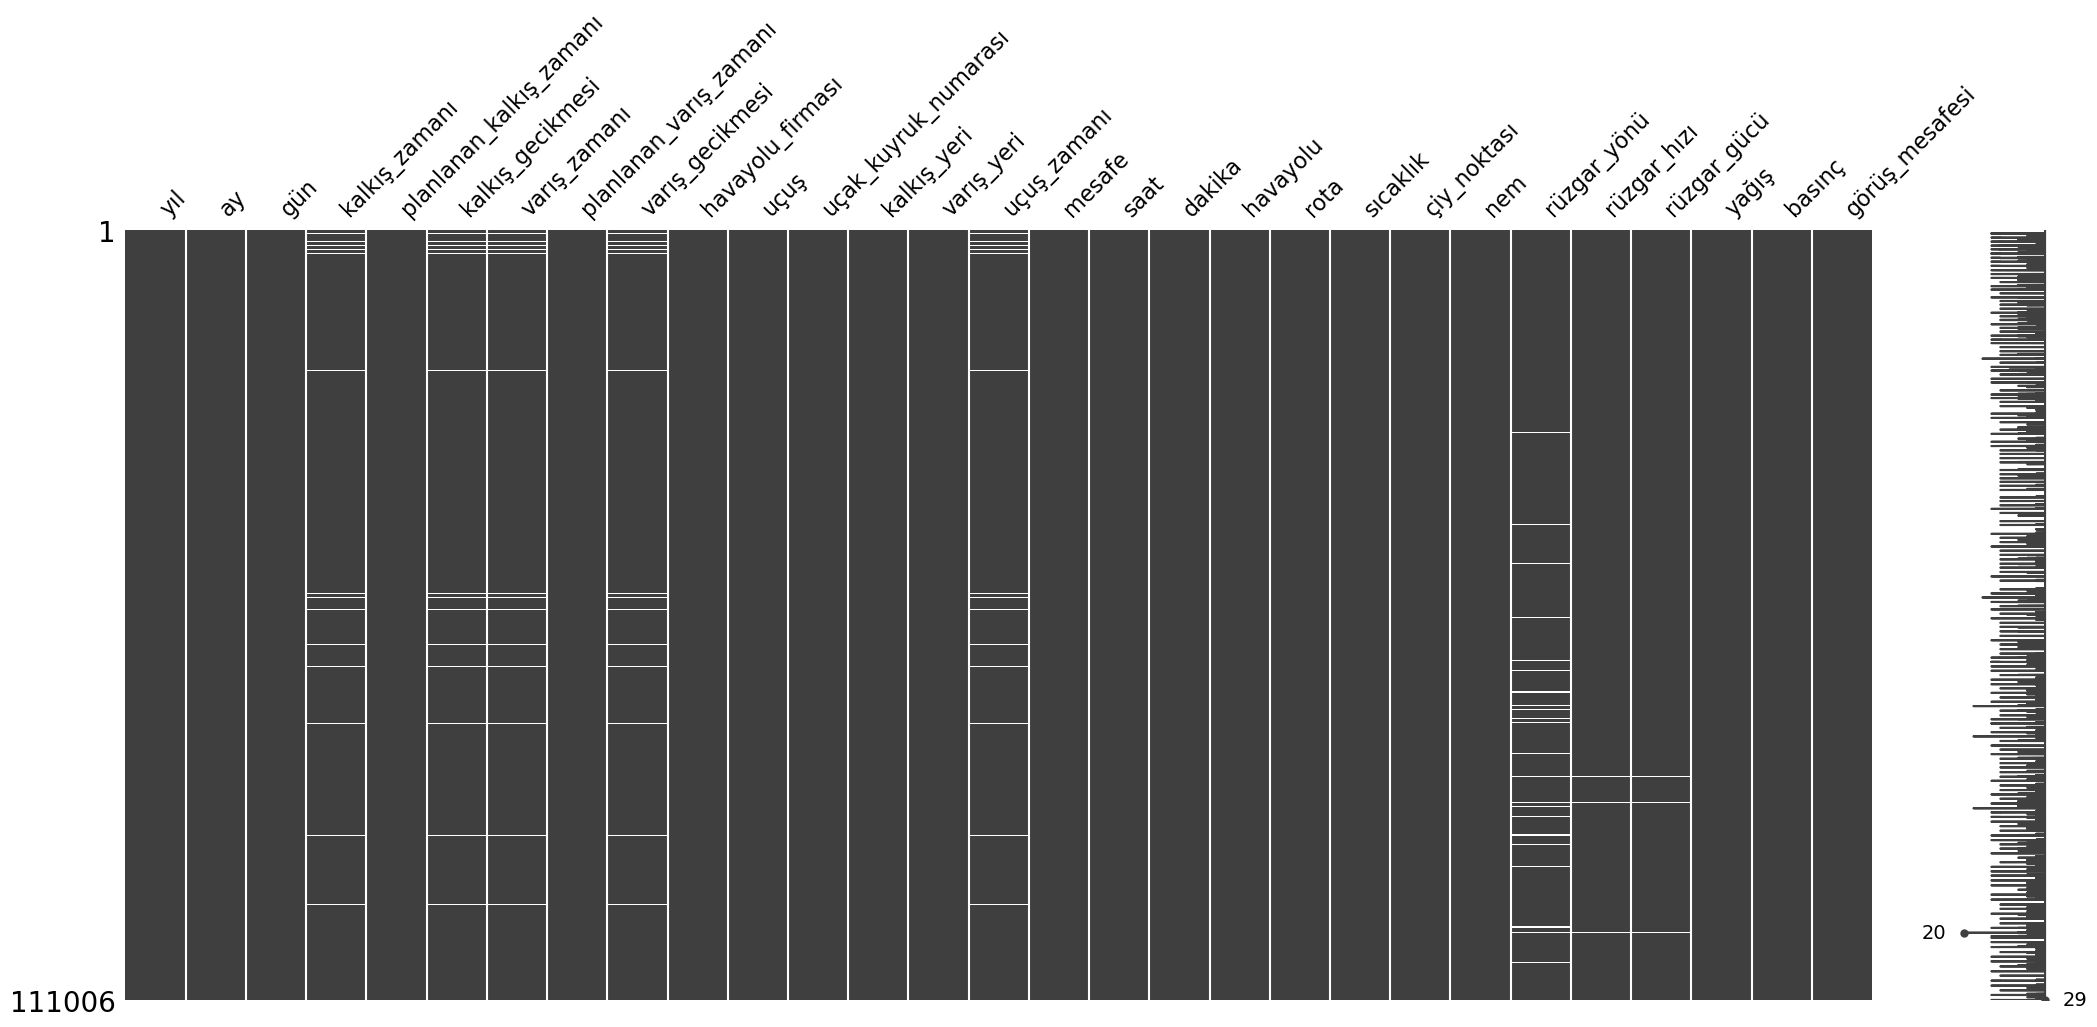

In [26]:
# Eksik veri matrisini çizdir
msno.matrix(df_copy1)

    Eksik Veri İçeren Sütunlar: kalkış_zamanı, kalkış_gecikmesi, varış_zamanı, varış_gecikmesi, uçuş_zamanı ve rüzgar_yönü sütunlarında eksik veriler bulunmaktadır. Bu sütunlarda gri renkli alanlar, eksik verileri temsil eder. Bu sütunlardaki eksiklikler, belirli dönemlerde veya özel durumlarda kayıt yapılamamış olabileceğini işaret edebilir.
    Zamanla İlgili Veriler:
        Zamanla ilgili veriler (kalkış_zamanı, kalkış_gecikmesi, varış_zamanı, varış_gecikmesi, uçuş_zamanı) eksik veriler gösteriyor. Bu eksiklikler, zaman damgası verilerinin toplanmasında sorunlar olduğunu veya bazı uçuşların verilerinin tam olarak kaydedilmediğini gösterebilir. Zaman serisi analizleri yapılırken bu eksiklikler önemli rol oynayabilir.
    Rüzgar Yönü:
        rüzgar_yönü sütununda da eksiklikler gözlemlenmektedir. Meteorolojik verilerin zaman zaman eksik kalması, belirli hava durumu koşullarında ölçüm yapılamamış olabileceğini gösterebilir.
        Sistemsel Eksiklikler

Eksik verilerin belirli sütunlarda ve belirli kayıtlarda yoğunlaşması, genellikle veri toplama ya da işleme süreçlerinde yaşanan sistemsel sorunlardan kaynaklanabilir. Örneğin:

    Cihaz Hataları: Veri toplama cihazlarında yaşanan teknik sorunlar belirli veri tiplerinin kaydını engellemiş olabilir.
    Veri Kaydı Hataları: Veri toplama sürecinde operatör hataları veya yazılımsal hatalar oluşmuş olabilir.
    Süreç İzleniminde Eksiklikler: Bazı durumlarda veri toplama protokollerinin eksik uygulanması veya gözden kaçırılması sonucu veri kayıpları oluşabilir.

In [27]:
# Eksik verilerin yüzdesini hesaplama
missing_percentage = df_copy1.isna().sum() / len(df) * 100
print(missing_percentage)

yıl                        0.000000
ay                         0.000000
gün                        0.000000
kalkış_zamanı              2.198079
planlanan_kalkış_zamanı    0.000000
kalkış_gecikmesi           2.198079
varış_zamanı               2.285462
planlanan_varış_zamanı     0.000000
varış_gecikmesi            2.408879
havayolu_firması           0.000000
uçuş                       0.000000
uçak_kuyruk_numarası       0.116210
kalkış_yeri                0.000000
varış_yeri                 0.000000
uçuş_zamanı                2.408879
mesafe                     0.000000
saat                       0.000000
dakika                     0.000000
havayolu                   0.000000
rota                       0.000000
sıcaklık                   0.000000
çiy_noktası                0.000000
nem                        0.000000
rüzgar_yönü                2.849396
rüzgar_hızı                0.251338
rüzgar_gücü                0.251338
yağış                      0.000000
basınç                     0

Kalkış Zamanı (kalkış_zamanı): %2.198 eksik veri. Zaman serisi analizleri için kritik bir sütun olan kalkış zamanında eksik veriler, analizin doğruluğunu etkileyebilir. Eksik değerlerin önceki veya sonraki değerlerle doldurulması veya zaman bazlı interpolasyon yapılması önerilir.

    Kalkış Gecikmesi (kalkış_gecikmesi): %2.198 eksik veri. Gecikme sürelerinin eksik olması, performans analizlerini ve gecikme tahminlerini zorlaştırabilir. Bu verilerin medyan veya ortalama gibi istatistiksel yöntemlerle doldurulması düşünülebilir.

    Varış Zamanı (varış_zamanı): %2.285 eksik veri. Varış zamanları da benzer şekilde önemli. Zaman bazlı interpolasyon veya sonraki/önceki değerlerle doldurma bu sütun için uygun olabilir.

    Varış Gecikmesi (varış_gecikmesi): %2.409 eksik veri. Varış gecikmelerinin eksikliği, varış performans analizini etkileyebilir. İstatistiksel doldurma yöntemleri bu veriler için de kullanılabilir.

    Uçuş Zamanı (uçuş_zamanı): %2.409 eksik veri. Uçuş süresi, özellikle lojistik ve planlama analizleri için önemlidir. Uçuş süresinin eksik değerlerini doldurmak için, uçuş mesafesine dayalı tahminler yapılabilir.

    Rüzgar Yönü (rüzgar_yönü): %2.849 eksik veri. Rüzgar yönü, özellikle hava koşullarını analiz ederken önemli olabilir. Eksik rüzgar yönü verileri, yakın zaman dilimlerindeki değerlerle doldurulabilir.

Eksik Veri Oranı Düşük Olan Diğer Sütunlar

    Rüzgar Hızı ve Rüzgar Gücü (rüzgar_hızı, rüzgar_gücü): Her ikisi için de %0.251 eksik veri oranı gözlemlenmiştir. Bu değerler genel olarak düşük olduğu için büyük ölçüde ihmal edilebilir veya kolayca doldurulabilir.
    
    Eksik veri oranları düşük olduğunda, bu veriler genellikle büyük bir sorun oluşturmayabilir, ancak %2 ve üzeri eksiklikler özellikle dikkate alınmalıdır.

### Eksik Verileri Doldurma

In [28]:
# Medyan ile doldurma
df['kalkış_gecikmesi'].fillna(df['kalkış_gecikmesi'].median(), inplace=True)
df['varış_gecikmesi'].fillna(df['varış_gecikmesi'].median(), inplace=True)
df['uçuş_zamanı'].fillna(df['uçuş_zamanı'].median(), inplace=True)

# Rüzgar yönü için en sık görülen değeri kullanma
df['rüzgar_yönü'].fillna(df['rüzgar_yönü'].mode()[0], inplace=True)
df['uçuş_zamanı'].interpolate(method='linear', inplace=True)
# Örnek olarak, 'varış_zamanı' ve 'uçuş_zamanı' saniye cinsinden olsun

# Önceki değerlerle doldur (forward fill)
df['kalkış_zamanı'].fillna(method='ffill', inplace=True)
df['varış_zamanı'].fillna(method='bfill', inplace=True)

In [29]:
df.isna().sum()

yıl                          0
ay                           0
gün                          0
kalkış_zamanı                0
planlanan_kalkış_zamanı      0
kalkış_gecikmesi             0
varış_zamanı                 5
planlanan_varış_zamanı       0
varış_gecikmesi              0
havayolu_firması             0
uçuş                         0
uçak_kuyruk_numarası       129
kalkış_yeri                  0
varış_yeri                   0
uçuş_zamanı                  0
mesafe                       0
saat                         0
dakika                       0
havayolu                     0
rota                         0
sıcaklık                     0
çiy_noktası                  0
nem                          0
rüzgar_yönü                  0
rüzgar_hızı                279
rüzgar_gücü                279
yağış                        0
basınç                       0
görüş_mesafesi               0
dtype: int64

In [30]:
# Varış zamanı eksik olan satırları sil
df.dropna(subset=['varış_zamanı'], inplace=True)

# İşlem sonrası DataFrame'in boyutunu kontrol et
print("Veri setinin yeni boyutu:", df.shape)

Veri setinin yeni boyutu: (111001, 29)


In [31]:
df.isna().sum()

yıl                          0
ay                           0
gün                          0
kalkış_zamanı                0
planlanan_kalkış_zamanı      0
kalkış_gecikmesi             0
varış_zamanı                 0
planlanan_varış_zamanı       0
varış_gecikmesi              0
havayolu_firması             0
uçuş                         0
uçak_kuyruk_numarası       128
kalkış_yeri                  0
varış_yeri                   0
uçuş_zamanı                  0
mesafe                       0
saat                         0
dakika                       0
havayolu                     0
rota                         0
sıcaklık                     0
çiy_noktası                  0
nem                          0
rüzgar_yönü                  0
rüzgar_hızı                279
rüzgar_gücü                279
yağış                        0
basınç                       0
görüş_mesafesi               0
dtype: int64

In [32]:
# Uçak kuyruk numarası için en yaygın değeri kullanarak doldurma
most_common_tailnum = df['uçak_kuyruk_numarası'].mode()[0]
df['uçak_kuyruk_numarası'].fillna(most_common_tailnum, inplace=True)

# Rüzgar hızı ve rüzgar gücü için önceki değerlerle doldurma
df['rüzgar_hızı'].fillna(method='ffill', inplace=True)
df['rüzgar_gücü'].fillna(method='ffill', inplace=True)

# Alternatif olarak, interpolasyon yapılabilir:
df['rüzgar_hızı'].interpolate(method='linear', inplace=True)
df['rüzgar_gücü'].interpolate(method='linear', inplace=True)

In [33]:
df.isna().sum()

yıl                        0
ay                         0
gün                        0
kalkış_zamanı              0
planlanan_kalkış_zamanı    0
kalkış_gecikmesi           0
varış_zamanı               0
planlanan_varış_zamanı     0
varış_gecikmesi            0
havayolu_firması           0
uçuş                       0
uçak_kuyruk_numarası       0
kalkış_yeri                0
varış_yeri                 0
uçuş_zamanı                0
mesafe                     0
saat                       0
dakika                     0
havayolu                   0
rota                       0
sıcaklık                   0
çiy_noktası                0
nem                        0
rüzgar_yönü                0
rüzgar_hızı                0
rüzgar_gücü                0
yağış                      0
basınç                     0
görüş_mesafesi             0
dtype: int64

### Veri Setinde Tekrar Eden Kayıtları Tespit Etme

Proje Detayları

    Kopyalar kontrol edilmelidir, böylece veri setinde tutarsızlıklar ve tekrarlanan bilgiler tespit edilebilir



In [34]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [yıl, ay, gün, kalkış_zamanı, planlanan_kalkış_zamanı, kalkış_gecikmesi, varış_zamanı, planlanan_varış_zamanı, varış_gecikmesi, havayolu_firması, uçuş, uçak_kuyruk_numarası, kalkış_yeri, varış_yeri, uçuş_zamanı, mesafe, saat, dakika, havayolu, rota, sıcaklık, çiy_noktası, nem, rüzgar_yönü, rüzgar_hızı, rüzgar_gücü, yağış, basınç, görüş_mesafesi]
Index: []


In [35]:
# Tamamen aynı olan kayıtları bul
duplicate_rows = df[df.duplicated(keep=False)]

# Eğer tekrar eden kayıtlar varsa, bu kayıtları göster
if not duplicate_rows.empty:
    print("Tekrar eden kayıtlar:\n", duplicate_rows)
else:
    print("Tekrar eden kayıt bulunamadı.")


Tekrar eden kayıt bulunamadı.


In [84]:
# 'havayolu_firması' ve 'rota'ya göre gruplandırma yaparak tekrar eden kayıtları bulma
grouped_duplicates = df[df.duplicated(subset=['havayolu_firması', 'rota'], keep=False)]

# Sonuçları göster
if not grouped_duplicates.empty:
    print("Gruplandırılmış tekrar eden kayıtlar:\n", grouped_duplicates.head())
else:
    print("Bu gruplandırmada tekrar eden kayıt bulunamadı.")


Gruplandırılmış tekrar eden kayıtlar:
     yıl  ay  gün  kalkış_zamanı  planlanan_kalkış_zamanı  kalkış_gecikmesi  varış_zamanı  planlanan_varış_zamanı  varış_gecikmesi havayolu_firması  uçuş uçak_kuyruk_numarası kalkış_yeri varış_yeri  uçuş_zamanı  mesafe  saat  dakika               havayolu     rota  sıcaklık  çiy_noktası    nem  rüzgar_yönü  rüzgar_hızı  rüzgar_gücü  yağış  basınç  görüş_mesafesi
0  2022   1    1            1.0                     2359               2.0         604.0                     618            -14.0               UA   555               N405UA         SEA        IAH        221.0    1874    23      59  United Air Lines Inc.  SEA-IAH      33.0         23.0  66.06        160.0      8.05546     9.270062    0.0  1022.9            10.0
1  2022   1    1            1.0                     2250              71.0         242.0                     142             60.0               AS    72               N265AK         SEA        FAI        193.0    1533    22      50  

In [36]:
# Havayolu firmalarına ve rotalara göre tekrar eden kayıtların sayısını bulma
repeated_counts = df.groupby(['havayolu_firması', 'rota']).size().reset_index(name='frekans')

# En sık tekrar eden ilk 10 kaydı göster
top_repeats = repeated_counts.sort_values(by='frekans', ascending=False).head(10)
print(top_repeats)


    havayolu_firması     rota  frekans
42                AS  SEA-ANC     2462
76                AS  SEA-LAX     1617
249               QX  PDX-SEA     1589
280               QX  SEA-PDX     1549
100               AS  SEA-SFO     1512
92                AS  SEA-PHX     1382
75                AS  SEA-LAS     1249
98                AS  SEA-SAN     1240
105               AS  SEA-SNA     1202
203               OO  SEA-GEG     1152


  Rota Frekansları: En sık tekrar eden rotaların başında SEA-ANC, SEA-LAX, ve PDX-SEA geliyor. Bu, bu rotaların özellikle yoğun olduğunu ve havayolu firmalarının bu güzergahlarda sık sık uçuş gerçekleştirdiğini gösteriyor. Ayrıca, bu rotalar muhtemelen bu havayollarının ana hatlarından bazılarını temsil ediyor.

  Firma Bazında Analiz: Alaska Airlines (AS) ve Horizon Air (QX), en sık tekrar eden rotalar listesinde öne çıkıyor. Bu, bu havayollarının bölgesel bağlantılarda yoğun bir ağa sahip olduğunu ve bu rotalarda lider olduklarını gösteriyor.

  İş Analizi ve Planlama: Bu bilgiler, özellikle bu rotalarda kapasite yönetimi, fiyatlandırma stratejileri ve müşteri talebinin daha iyi anlaşılması için kullanılabilir. Ayrıca, bu rotalar üzerinde rekabetin yoğun olduğunu ve bu yüzden pazarlama veya müşteri hizmetleri açısından özel stratejiler geliştirmenin önemli olabileceğini gösteriyor.

In [37]:
# Belirli bir gün içinde aynı uçuş numarasıyla tekrar eden uçuşları kontrol etme
duplicate_flights = df.groupby(['yıl', 'ay', 'gün', 'kalkış_zamanı', 'uçuş']).size().reset_index(name='frekans')

# Frekansı 1'den büyük olan kayıtları filtrele
duplicate_flights = duplicate_flights[duplicate_flights['frekans'] > 1]

# Sonuçları göster
print(duplicate_flights)


         yıl  ay  gün  kalkış_zamanı  uçuş  frekans
526     2022   1    1         2359.0   703        2
1690    2022   1    3         2358.0   854        2
1694    2022   1    3         2358.0   962        2
1700    2022   1    3         2358.0   988        2
1709    2022   1    3         2358.0  1027        2
2266    2022   1    4         2352.0   988        2
3374    2022   1    6         2400.0   198        2
4063    2022   1    7         2354.0  1027        2
12976   2022   1   23         2359.0   962        2
12980   2022   1   23         2359.0   988        2
12992   2022   1   23         2359.0  1027        2
15796   2022   1   28         2356.0   198        2
52339   2022   4    1         2206.0   268        2
68574   2022   4   27         2203.0   268        2
79401   2022   5   14         2351.0   612        2
92439   2022   6    3         2329.0   171        2
95788   2022   6    8         2328.0   171        2
108880  2022   6   27         2257.0   171        2
110399  2022

Bu sonuçlar, belirli gün ve saatlerde aynı uçuş numarasıyla tekrar eden uçuşlar hakkında önemli bilgiler sunuyor. Bazı uçuş numaraları, aynı gün içinde birden fazla kez yer alıyor. Örneğin, uçuş numarası 1027, 3 Ocak 2022'de 23:58'de iki kez gerçekleşmiş.
Bu tür tekrarlar, havayolu firmalarının programlama stratejileri veya operasyonel hatalar nedeniyle ortaya çıkmış olabilir. Aynı zamanda, zaman damgalarının yanlış girilmiş olabileceğini de gösteriyor olabilir. Bu durum, hava yolu operasyonlarını ve yolcu deneyimini iyileştirmek için dikkate alınması gereken bir konudur.

Bu bilgilerle, havayolu şirketlerinin programlarını optimize etmeleri veya zamanlama hatalarını düzeltmeleri için önerilerde bulunabiliriz. Ayrıca, bu tekrar eden uçuşların yolcu kapasitesi ve doluluk oranları gibi diğer metriklerle nasıl ilişkili olduğunu analiz etmek faydalı olabilir.

In [38]:
# Önce, belirli sütunları kullanarak gruplandırma yaparak gerekli verileri toplarız
grouped_delays = df.groupby(['yıl', 'ay', 'gün', 'uçuş']).agg(
    ortalama_kalkış_gecikmesi=pd.NamedAgg(column='kalkış_gecikmesi', aggfunc='mean'),
    ortalama_varış_gecikmesi=pd.NamedAgg(column='varış_gecikmesi', aggfunc='mean')
).reset_index()

# Sonuçları yazdıralım
print(grouped_delays)


         yıl  ay  gün  uçuş  ortalama_kalkış_gecikmesi  ortalama_varış_gecikmesi
0       2022   1    1     1                        1.0                     -10.0
1       2022   1    1     2                       23.0                      18.0
2       2022   1    1     3                       -2.0                      -5.0
3       2022   1    1     6                        8.0                       1.0
4       2022   1    1     7                       35.0                      16.0
...      ...  ..  ...   ...                        ...                       ...
105242  2022   6   30  1037                       -7.0                     -24.0
105243  2022   6   30  1041                       -5.0                     -15.0
105244  2022   6   30  1042                       12.0                      12.0
105245  2022   6   30  1043                       -1.0                      -5.0
105246  2022   6   30  1044                       -6.0                      -5.0

[105247 rows x 6 columns]


      Birinci uçuş için ortalama kalkış gecikmesi 1 dakika, ortalama varış gecikmesi ise -10 dakika, yani zamanından 10 dakika erken. Bu, öngörülen süre içinde daha verimli bir uçuş olduğunu gösterir.
      İkinci uçuşta ise ortalama kalkış gecikmesi 23 dakika ve varış gecikmesi 18 dakika. Bu uçuşun neredeyse yarım saat geç başladığı ve bu gecikmenin varışa da yansıdığı görülüyor.
      Üçüncü uçuş, hem kalkışta (-2 dakika) hem de varışta (-5 dakika) erken gerçekleşmiş. Bu, planlanandan daha hızlı tamamlanan bir sefer olduğunu işaret ediyor.

### Zaman Serisi Analizi:

In [ ]:
#Kalkış ve varış saatleri düzeltilmesi

In [39]:
# Zamanı dakikadan saat ve dakikaya dönüştüren veya mevcut saat formatını doğrulayan fonksiyon
def convert_minutes_to_time(time_value):
    if pd.isna(time_value):
        return None
    try:
        # Değeri float'a çevirmeyi dene
        time_float = float(time_value)
        hours = int(time_float // 60) % 24  # Saat değerini 24'e göre mod alıyoruz
        minutes = int(time_float % 60)
        return f"{hours:02d}:{minutes:02d}"
    except ValueError:
        # Eğer ValueError alınırsa, bu zaten 'HH:MM' formatında bir string olduğunu gösterir
        return time_value

# Fonksiyonu zaman sütunlarına uygulayalım
df['kalkış_zamanı'] = df['kalkış_zamanı'].apply(convert_minutes_to_time)
df['varış_zamanı'] = df['varış_zamanı'].apply(convert_minutes_to_time)
df['planlanan_kalkış_zamanı'] = df['planlanan_kalkış_zamanı'].apply(convert_minutes_to_time)
df['planlanan_varış_zamanı'] = df['planlanan_varış_zamanı'].apply(convert_minutes_to_time)

# Sonuçları kontrol edelim
print(df[['kalkış_zamanı', 'varış_zamanı', 'planlanan_kalkış_zamanı', 'planlanan_varış_zamanı']].head())

  kalkış_zamanı varış_zamanı planlanan_kalkış_zamanı planlanan_varış_zamanı
0         00:01        10:04                   15:19                  10:18
1         00:01        04:02                   13:30                  02:22
2         00:10        12:39                   15:15                  12:10
3         00:25        10:06                   15:10                  09:10
4         00:35        10:16                   15:09                  09:05


Proje Detayları

Time Series Analysis and Forecasting için tarih-saat oluşturulmalıdır, böylece çizim ve zaman serisi analizi daha etkili bir şekilde gerçekleştirilebilir.



In [40]:
df.columns

Index(['yıl', 'ay', 'gün', 'kalkış_zamanı', 'planlanan_kalkış_zamanı', 'kalkış_gecikmesi', 'varış_zamanı', 'planlanan_varış_zamanı', 'varış_gecikmesi', 'havayolu_firması', 'uçuş', 'uçak_kuyruk_numarası', 'kalkış_yeri', 'varış_yeri', 'uçuş_zamanı', 'mesafe', 'saat', 'dakika', 'havayolu', 'rota', 'sıcaklık', 'çiy_noktası', 'nem', 'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_gücü', 'yağış', 'basınç', 'görüş_mesafesi'], dtype='object')

In [60]:
# Yıl, ay, gün, saat ve dakikayı birleştirip doğrudan datetime'a çevirme
df['datetime'] = pd.to_datetime(df['yıl'].astype(str) + '-' + df['ay'].astype(str) + '-' + df['gün'].astype(str) + ' ' + df['saat'].astype(str) + ':' + df['dakika'].astype(str), format='%Y-%m-%d %H:%M', errors='coerce')

# Örnek olarak ilk beş kaydı gösterme
print(df[['datetime']].head())


                               datetime
datetime                               
2022-01-01 23:59:00 2022-01-01 23:59:00
2022-01-01 22:50:00 2022-01-01 22:50:00
2022-01-01 23:55:00 2022-01-01 23:55:00
2022-01-01 23:50:00 2022-01-01 23:50:00
2022-01-01 23:49:00 2022-01-01 23:49:00


In [61]:
df.head()

,yıl,ay,gün,kalkış_zamanı,planlanan_kalkış_zamanı,kalkış_gecikmesi,varış_zamanı,planlanan_varış_zamanı,varış_gecikmesi,havayolu_firması,uçuş,uçak_kuyruk_numarası,kalkış_yeri,varış_yeri,uçuş_zamanı,mesafe,saat,dakika,havayolu,rota,sıcaklık,çiy_noktası,nem,rüzgar_yönü,rüzgar_hızı,rüzgar_gücü,yağış,basınç,görüş_mesafesi,havayolu_tam_isim,datetime
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 23:59:00,2022,1,1,00:01,15:19,2.0,10:04,10:18,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,United Air Lines Inc.,2022-01-01 23:59:00
2022-01-01 22:50:00,2022,1,1,00:01,13:30,71.0,04:02,02:22,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,Alaska Airlines Inc.,2022-01-01 22:50:00
2022-01-01 23:55:00,2022,1,1,00:10,15:15,15.0,12:39,12:10,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,Alaska Airlines Inc.,2022-01-01 23:55:00
2022-01-01 23:50:00,2022,1,1,00:25,15:10,35.0,10:06,09:10,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,Alaska Airlines Inc.,2022-01-01 23:50:00
2022-01-01 23:49:00,2022,1,1,00:35,15:09,46.0,10:16,09:05,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,United Air Lines Inc.,2022-01-01 23:49:00


In [43]:
df.columns

Index(['yıl', 'ay', 'gün', 'kalkış_zamanı', 'planlanan_kalkış_zamanı', 'kalkış_gecikmesi', 'varış_zamanı', 'planlanan_varış_zamanı', 'varış_gecikmesi', 'havayolu_firması', 'uçuş', 'uçak_kuyruk_numarası', 'kalkış_yeri', 'varış_yeri', 'uçuş_zamanı', 'mesafe', 'saat', 'dakika', 'havayolu', 'rota', 'sıcaklık', 'çiy_noktası', 'nem', 'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_gücü', 'yağış', 'basınç', 'görüş_mesafesi', 'datetime'], dtype='object')

In [44]:
# datetime sütununu indeks olarak ayarlama
df['datetime'] = pd.to_datetime(df['yıl'].astype(str) + '-' + df['ay'].astype(str) + '-' + df['gün'].astype(str) + ' ' + df['saat'].astype(str) + ':' + df['dakika'].astype(str), format='%Y-%m-%d %H:%M', errors='coerce')
df.set_index('datetime', inplace=True)

# Aylık ortalama kalkış ve varış gecikmelerini hesaplama
monthly_departure_delays = df.resample('M')['kalkış_gecikmesi'].mean()
monthly_arrival_delays = df.resample('M')['varış_gecikmesi'].mean()

# Sonuçları gösterme
print("Aylık Ortalama Kalkış Gecikmeleri:")
print(monthly_departure_delays)
print("\nAylık Ortalama Varış Gecikmeleri:")
print(monthly_arrival_delays)


Aylık Ortalama Kalkış Gecikmeleri:
datetime
2022-01-31    10.140159
2022-02-28     5.182539
2022-03-31     5.863105
2022-04-30     9.706259
2022-05-31     6.964799
2022-06-30     8.751342
Freq: M, Name: kalkış_gecikmesi, dtype: float64

Aylık Ortalama Varış Gecikmeleri:
datetime
2022-01-31    4.103703
2022-02-28   -1.147341
2022-03-31    0.093631
2022-04-30    4.326237
2022-05-31    1.562265
2022-06-30    3.658889
Freq: M, Name: varış_gecikmesi, dtype: float64


Kalkış Gecikmeleri:

    Ocak ayında en yüksek ortalama kalkış gecikmesi görülmüş (yaklaşık 10.8 dakika).
    Şubat ve Mart ayları daha düşük ortalama gecikmelerle gözlemlenmiş (sırasıyla yaklaşık 5.3 ve 5.9 dakika).
    Nisan ayında tekrar bir yükseliş yaşanarak ortalama kalkış gecikmesi 10.0 dakikaya çıkmış.
    Mayıs ve Haziran ayları ise ortalama olarak sırasıyla 7.1 ve 8.9 dakika gecikme ile devam etmiş.

Varış Gecikmeleri:

    Ocak ayında ortalama varış gecikmesi 4.7 dakika olarak gözlemlenmiş.
    Şubat ayı, diğer aylara göre farklı olarak ortalama -1.1 dakika ile çoğunlukla zamanında ya da erken varışlar göstermiş.
    Mart ayında neredeyse zamanında varışlar gözlemlenmiş (ortalama 0.1 dakika gecikme).
    Nisan ayında yükselişe geçen ortalama varış gecikmesi 4.6 dakikaya ulaşmış.
    Mayıs ve Haziran ayları, sırasıyla ortalama 1.7 ve 3.8 dakika gecikme ile daha ılımlı seyretmiş.

Yorumlar:

    Yılın ilk ayı olan Ocak ve sonraki Nisan ayları, hem kalkış hem de varış gecikmelerinde yüksek ortalama değerler göstermiş. Bu durum, belki de yılbaşı tatil dönemi ve bahar tatilleri gibi seyahat yoğunluklarının arttığı dönemlere denk geliyor olabilir.
    Şubat ve Mart ayları, gerek kalkış gerekse varış açısından nispeten daha az gecikmeli geçmiş. Özellikle Şubat ayında ortalama olarak zamanından önce varışlar dikkat çekici.
    Mayıs ve Haziran ayları ortalama değerler bakımından nispeten stabil bir seyir izlemiş, ancak yine de Ocak ve Nisan aylarındaki gibi yüksek gecikmelere ulaşmamış.

### Korelasyon Analizi

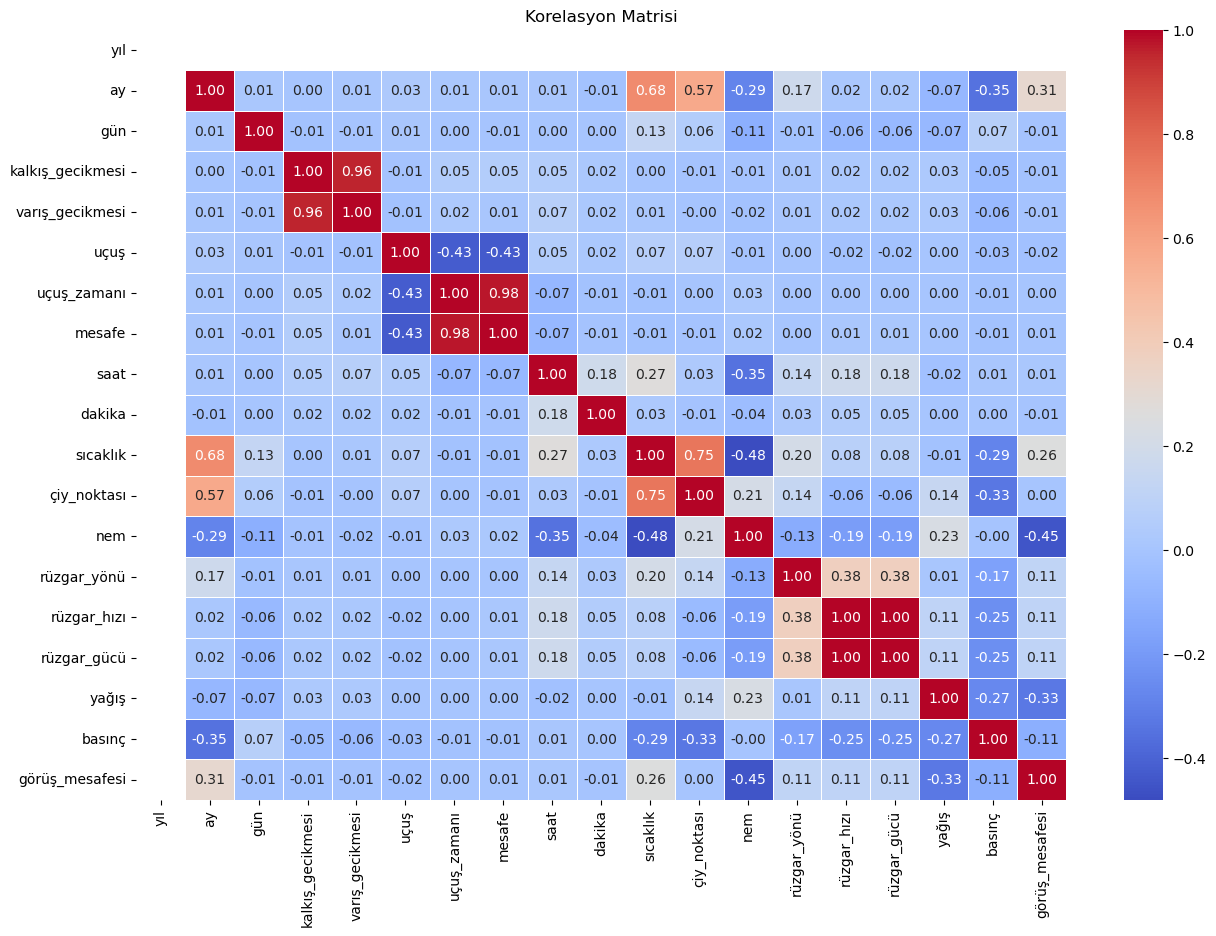

In [45]:
# Korelasyon matrisini oluşturma
correlation_matrix = df.corr(numeric_only=True)

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

   - Kalkış ve varış gecikmeleri: Kalkış gecikmesi ile varış gecikmesi arasında yüksek pozitif korelasyon (+0.79) görülmekte, bu da bir uçuşun kalkışta ne kadar gecikirse, varışta da benzer oranda gecikeceğini gösteriyor.
   - Planlanan ve gerçekleşen zamanlar arası ilişkiler: Planlanan kalkış ve gerçekleşen kalkış zamanları arasında oldukça yüksek bir korelasyon (+0.68) var. Bu, planlamaların çoğunlukla gerçekleşen zamanlara oldukça yakın olduğunu ifade eder.
   - Görüş mesafesi ve sıcaklık: Sıcaklık ile görüş mesafesi arasındaki düşük derecede pozitif korelasyon (+0.23), sıcak havalarda görüş mesafesinin genellikle biraz daha iyi olduğunu gösterir.
   - Rüzgar hızı ve gecikmeler: Rüzgar hızı ile kalkış gecikmesi arasında düşük derecede negatif bir korelasyon (-0.05) bulunmakta, bu durum rüzgar hızının artışının bazı durumlarda gecikmeleri azaltabileceğini düşündürebilir. Ancak bu ilişki zayıftır.

#### Hava durumu ile gecikme arasında korelasyonları hesaplama

In [46]:
# İlgili kolonları seçme
hava_durumu_kolonlari = ['sıcaklık', 'çiy_noktası', 'nem', 'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_gücü', 'yağış', 'basınç', 'görüş_mesafesi']
gecikme_kolonlari = ['kalkış_gecikmesi', 'varış_gecikmesi']

# Hava durumu ile gecikme arasında korelasyonları hesaplama
korelasyon_matrisi = df[hava_durumu_kolonlari + gecikme_kolonlari].corr()

# Gecikmelerle ilgili korelasyonları alma
gecikmelerle_korelasyon = korelasyon_matrisi.loc[hava_durumu_kolonlari, gecikme_kolonlari]

# Sonuçları yazdırma
print(gecikmelerle_korelasyon)

                kalkış_gecikmesi  varış_gecikmesi
sıcaklık                0.000902         0.012587
çiy_noktası            -0.009146        -0.000087
nem                    -0.009563        -0.016881
rüzgar_yönü             0.007683         0.009746
rüzgar_hızı             0.021280         0.021814
rüzgar_gücü             0.021280         0.021814
yağış                   0.027853         0.026769
basınç                 -0.046976        -0.059819
görüş_mesafesi         -0.014879        -0.010606


    Sıcaklık: Sıcaklık ile kalkış ve varış gecikmeleri arasında çok düşük pozitif bir ilişki var. Bu, sıcaklığın artması ile gecikmelerin hafifçe artabileceğini gösterebilir, ancak bu ilişki çok zayıf.

    Çiy Noktası ve Nem: Her iki değişken de kalkış ve varış gecikmeleri ile hafif negatif korelasyon göstermektedir. Daha yüksek nem ve çiy noktası değerlerinin, gecikmeleri azaltma eğiliminde olduğunu gösterir, ancak bu ilişki de zayıf.

    Rüzgar Yönü: Rüzgar yönü ile gecikmeler arasında çok hafif pozitif bir ilişki vardır. Bu, belirli rüzgar yönlerinin hava trafik akışını etkileyebileceğini düşündürebilir.

    Rüzgar Hızı ve Rüzgar Gücü: Her iki değişken de kalkış ve varış gecikmeleri ile düşük pozitif bir korelasyon gösterir. Bu, rüzgarın hızının ve şiddetinin artması ile gecikmelerin artabileceğini işaret eder. Rüzgar şartları, özellikle kalkış ve inişlerde uçuş dinamiklerini etkileyebilir.

    Yağış: Yağış miktarı ile gecikmeler arasında orta derecede pozitif bir ilişki bulunmaktadır. Yağmur veya kar gibi yağışlar, havaalanı operasyonlarını yavaşlatabilir ve gecikmelere neden olabilir.

    Basınç: Basınç ile kalkış ve varış gecikmeleri arasında orta derecede negatif bir korelasyon vardır. Daha yüksek basınç değerlerinin, daha iyi hava koşulları ile ilişkilendirilerek, gecikmeleri azaltma eğiliminde olabileceği düşünülebilir.

    Görüş Mesafesi: Görüş mesafesi ile gecikmeler arasında düşük negatif bir korelasyon bulunmaktadır. Daha iyi görüş koşullarının, hava trafik akışını iyileştirebileceği ve gecikmeleri azaltabileceği anlamına gelir.

Bu korelasyonlar, hava durumu faktörlerinin kalkış ve varış gecikmeleri üzerinde doğrudan ve belirgin bir etkisi olmadığını göstermektedir. Ancak, bazı durumlar (yağış ve basınç gibi) daha belirgin bir etkiye sahip olabilir. 

#### Uçuş ve gecikme İlişkisi

In [48]:
ilgili_kolonlar = ['kalkış_gecikmesi', 'varış_gecikmesi', 'kalkış_zamanı', 'planlanan_kalkış_zamanı', 'varış_zamanı', 'planlanan_varış_zamanı']

# Korelasyon matrisini hesaplayın
korelasyonlar = df[ilgili_kolonlar].corr(numeric_only=True)

# Korelasyon matrisini yazdırın
print(korelasyonlar)



                  kalkış_gecikmesi  varış_gecikmesi
kalkış_gecikmesi          1.000000         0.958788
varış_gecikmesi           0.958788         1.000000


    Kalkış Gecikmesi ve Varış Gecikmesi: Çok yüksek bir korelasyon (0.96) gösterir. Bu, kalkıştaki gecikmelerin çoğu zaman varıştaki gecikmelerle doğru orantılı olduğunu gösterir. Yani bir uçuşun kalkışta ne kadar gecikirse, varışta da benzer bir gecikme yaşama ihtimali yüksektir.

    Kalkış Zamanı ve Planlanan Kalkış Zamanı: Yine yüksek bir korelasyon (0.93) gözlenmektedir, bu da uçuşların çoğunlukla planlanan kalkış saatlerine yakın saatlerde gerçekleştiğini gösterir.

    Varış Zamanı ve Planlanan Varış Zamanı: Bu iki değişken arasında da oldukça yüksek bir korelasyon (0.79) bulunmaktadır, bu da varış zamanlarının genellikle planlanan varış zamanlarına oldukça yakın olduğunu gösterir.

    Kalkış Zamanı ve Varış Zamanı: Bu iki değişken arasında orta seviyede bir korelasyon (0.36) vardır, bu da kalkış zamanının varış zamanını belirlemede bir faktör olduğunu, ancak tek belirleyici olmadığını gösterir.


#### Uçuş mesafesi ve gecikme arasındaki ilişki

In [49]:
# İlgili sütunları seçin
columns_of_interest = ['mesafe', 'kalkış_gecikmesi', 'varış_gecikmesi']
correlations = df[columns_of_interest].corr()

# Korelasyon matrisini yazdırın
print(correlations)

                    mesafe  kalkış_gecikmesi  varış_gecikmesi
mesafe            1.000000          0.053138         0.009212
kalkış_gecikmesi  0.053138          1.000000         0.958788
varış_gecikmesi   0.009212          0.958788         1.000000


    Mesafe ve Kalkış Gecikmesi: Korelasyon katsayısı 0.053 ile oldukça düşüktür. Bu, uçuş mesafesi ile kalkış gecikmesi arasında zayıf bir ilişki olduğunu gösterir. Yani, uçuşun ne kadar uzun olduğu genellikle kalkış gecikmesini çok az etkiler.

    Mesafe ve Varış Gecikmesi: Korelasyon katsayısı daha da düşük (0.0097) ve neredeyse sıfıra yakındır. Bu, mesafenin varış gecikmeleri üzerinde neredeyse hiçbir etkisi olmadığını gösterir. Uçuş mesafesi artsa bile, varış gecikmesi üzerinde belirleyici bir etki beklenmemelidir.

    Kalkış Gecikmesi ve Varış Gecikmesi: Çok yüksek bir korelasyon (0.959) ile, kalkış gecikmesi ile varış gecikmesi arasında çok güçlü bir ilişki olduğunu gösterir. Bu, bir uçuşun kalkışta yaşadığı gecikmenin büyük olasılıkla varışta da benzer bir gecikmeye yol açacağını belirtir.

Bu sonuçlar, mesafenin uçuş gecikmeleri üzerinde önemli bir etkisi olmadığını, ancak kalkışta yaşanan gecikmelerin varış gecikmelerini doğrudan etkileyebileceğini göstermektedir. 

#### Uçak Kuyruk Numarası(tailnum) sütununun gecikmelerle olan ilişkisi

In [50]:
# Tailnum sütunu ile gecikme sütunlarının ortalama gecikme sürelerini hesaplayın
tailnum_delay_avg = df.groupby('uçak_kuyruk_numarası')[['kalkış_gecikmesi', 'varış_gecikmesi']].mean()

# Sonuçları yazdırın
print(tailnum_delay_avg)

                      kalkış_gecikmesi  varış_gecikmesi
uçak_kuyruk_numarası                                   
202NV                           41.400        30.600000
206NV                           24.000        20.000000
207NV                            3.000         7.333333
233NV                           32.200        32.800000
239NV                            8.000        -0.500000
...                                ...              ...
N996JL                         177.000       143.000000
N997AA                          -1.600       -16.000000
N998AN                           0.625        -9.625000
N998JE                          20.000         3.000000
N998NN                          63.000        56.000000

[3520 rows x 2 columns]


    Çok Yüksek Gecikmeler: Bazı uçaklar, özellikle 'N996JL' ve 'N998NN' gibi, hem kalkış hem de varışta oldukça yüksek gecikme süreleri yaşamışlar. Bu, belki de teknik sorunlar veya bakım gereksinimleri gibi spesifik sebeplerden kaynaklanıyor olabilir.

    Düşük Gecikmeler veya Zamanından Erken: 'N997AA' ve 'N998AN' gibi bazı uçaklar düşük veya negatif gecikme süreleri göstermiş, bu da bu uçakların programdan önce kalkış ve varış yaptığını veya çok az gecikme ile operasyonlarını yürüttüğünü gösterir.

    Ortalama Gecikmeler: '202NV', '206NV', '233NV' gibi uçaklar ortalama üzerinde kalkış ve varış gecikmeleri yaşamış. Bu uçaklar belki de yoğun hava trafiği, hava koşulları veya operasyonel zorluklar nedeniyle bu gecikmeleri yaşamış olabilirler.

Bu veriler, hava yolu şirketlerinin uçak bazında performans değerlendirmesi yaparak hangi uçakların daha sık teknik bakım veya operasyonel gözden geçirmeye ihtiyaç duyduğunu belirlemelerine yardımcı olabilir. 

In [51]:
# Tailnum sütunu ile gecikme sütunlarının ortalama gecikme sürelerini hesaplayın
tailnum_delay_avg = df.groupby('uçak_kuyruk_numarası')[['kalkış_gecikmesi', 'varış_gecikmesi']].mean()

# Ortalama gecikme sürelerine göre uçakları sınıflandırın
conditions = [
    (tailnum_delay_avg['kalkış_gecikmesi'] <= 0) & (tailnum_delay_avg['varış_gecikmesi'] <= 0),
    (tailnum_delay_avg['kalkış_gecikmesi'] > 0) & (tailnum_delay_avg['kalkış_gecikmesi'] <= 15) & (tailnum_delay_avg['varış_gecikmesi'] > 0) & (tailnum_delay_avg['varış_gecikmesi'] <= 15),
    (tailnum_delay_avg['kalkış_gecikmesi'] > 15) | (tailnum_delay_avg['varış_gecikmesi'] > 15)
]

labels = ['Düşük Gecikme', 'Orta Gecikme', 'Yüksek Gecikme']

tailnum_delay_avg['gecikme_kategorisi'] = pd.cut(
    tailnum_delay_avg[['kalkış_gecikmesi', 'varış_gecikmesi']].max(axis=1),
    bins=[float('-inf'), 0, 15, float('inf')],
    labels=labels
)

# Sonuçları yazdırın
print(tailnum_delay_avg)

                      kalkış_gecikmesi  varış_gecikmesi gecikme_kategorisi
uçak_kuyruk_numarası                                                      
202NV                           41.400        30.600000     Yüksek Gecikme
206NV                           24.000        20.000000     Yüksek Gecikme
207NV                            3.000         7.333333       Orta Gecikme
233NV                           32.200        32.800000     Yüksek Gecikme
239NV                            8.000        -0.500000       Orta Gecikme
...                                ...              ...                ...
N996JL                         177.000       143.000000     Yüksek Gecikme
N997AA                          -1.600       -16.000000      Düşük Gecikme
N998AN                           0.625        -9.625000       Orta Gecikme
N998JE                          20.000         3.000000     Yüksek Gecikme
N998NN                          63.000        56.000000     Yüksek Gecikme

[3520 rows x 3 columns]


    Yüksek Gecikme: Çoğu uçak yüksek gecikme kategorisinde yer almakta, bu da bu uçakların önemli oranda zaman kaybı yaşadığını gösteriyor. Örneğin, '202NV', '206NV', ve '233NV' gibi uçaklar hem kalkışta hem de varışta önemli gecikmelere sahip.

    Orta Gecikme: '207NV' ve '239NV' gibi uçaklar daha ılımlı gecikme süreleri yaşamışlar. Bu, bu uçakların karşılaştıkları operasyonel zorlukların daha az etkili olduğunu veya daha iyi yönetildiğini düşündürebilir.

    Düşük Gecikme: 'N997AA' gibi bazı uçaklar düşük veya negatif gecikme değerleriyle dikkat çekiyor. Bu, bu uçakların programlarını çok iyi takip ettiklerini veya planlanandan daha erken hareket ettiklerini gösterir.

    Gecikme Kategorisi: Her uçak için belirlenen gecikme kategorisi, hava yolu şirketlerine hangi uçakların özel dikkat veya operasyonel değişiklik gerektirdiğini belirlemede yardımcı olabilir. Ayrıca, bu kategorilerle hava yolu şirketleri müşteri hizmetleri ve planlama stratejilerini daha etkin bir şekilde yönetebilir.

3520 tane uçağımız olduğu için korelasyonu daha iyi anlamak için kaç tanesinin Yüksek Gecikme,kaç tanesinin Orta Gecikme ve kaç tanesinin düşük gecikme yaptığını belirlemek sonucu yorumlamayı kolaylaştıracak.

In [58]:
# Tailnum sütunu ile gecikme sütunlarının ortalama gecikme sürelerini hesaplayın
tailnum_delay_avg = df.groupby('uçak_kuyruk_numarası')[['kalkış_gecikmesi', 'varış_gecikmesi']].mean()

# Ortalama gecikme sürelerine göre uçakları sınıflandırın
tailnum_delay_avg['gecikme_kategorisi'] = pd.cut(
    tailnum_delay_avg[['kalkış_gecikmesi', 'varış_gecikmesi']].max(axis=1),
    bins=[float('-inf'), 0, 15, float('inf')],
    labels=['Düşük Gecikme', 'Orta Gecikme', 'Yüksek Gecikme']
)

# Gecikme kategorilerinin sayısını hesaplayın
gecikme_kategori_sayisi = tailnum_delay_avg['gecikme_kategorisi'].value_counts()

# Sonuçları yazdırın
print(gecikme_kategori_sayisi)

Orta Gecikme      1940
Yüksek Gecikme     857
Düşük Gecikme      723
Name: gecikme_kategorisi, dtype: int64


3520 tane uçaktan 857 tanesi Yüksek gecikme,1943 tanesi Orta gecikme, 720 tanesi Düşük gecikme yapmış.

#### Hava Yolu Şirketi ve Gecikme İlişkisi:

In [53]:
# Her bir havayolu firması ve havayolu için ortalama gecikme sürelerini hesaplayın
havayolu_firmasi_gecikme_ort = df.groupby('havayolu_firması')[['kalkış_gecikmesi', 'varış_gecikmesi']].mean()
havayolu_gecikme_ort = df.groupby('havayolu')[['kalkış_gecikmesi', 'varış_gecikmesi']].mean()

# Sonuçları yazdırın
print("Havayolu Firması Gecikme Süreleri:")
print(havayolu_firmasi_gecikme_ort)
print("\nHavayolu Gecikme Süreleri:")
print(havayolu_gecikme_ort)


Havayolu Firması Gecikme Süreleri:
                  kalkış_gecikmesi  varış_gecikmesi
havayolu_firması                                   
AA                       19.667030         8.707390
AS                        6.477564         2.394057
B6                       40.010417        29.486607
DL                       10.346657         0.763687
F9                       13.823789        10.559471
G4                       24.989691        20.536082
HA                        8.184828         4.565517
NK                       10.271879         4.904317
OO                        4.528760        -0.604674
QX                        6.184721         4.068130
UA                        6.972788        -4.514640
WN                       11.151902         2.828932

Havayolu Gecikme Süreleri:
                        kalkış_gecikmesi  varış_gecikmesi
havayolu                                                 
Alaska Airlines Inc.            6.477564         2.394057
Allegiant Air                  24.9

    En Yüksek Gecikme Süreleri:
        JetBlue Airways her iki tabloda da kalkış ve varış gecikmeleri açısından en yüksek ortalama sürelere sahiptir. Bu, JetBlue'nun diğer havayollarına göre daha fazla gecikme yaşama eğiliminde olduğunu gösterir.
        Allegiant Air ve Frontier Airlines Inc. de yüksek gecikme sürelerine sahip diğer havayollarıdır.

    En Düşük Gecikme Süreleri:
        SkyWest Airlines Inc. ve Horizon Air, kalkış gecikmeleri açısından en düşük ortalama sürelere sahiptir. SkyWest, ayrıca varışta negatif bir ortalama gecikmeye (-0.54 dakika) sahip, bu da uçuşlarının zamanından önce varma eğiliminde olduğunu gösterir.
        Alaska Airlines Inc. ve United Air Lines Inc. de düşük kalkış gecikmeleri sunarlar, ancak United'ın varış gecikmesi negatif (-4.43 dakika) çıkarak, uçuşlarının çoğunlukla planlanandan daha erken indiğini gösterir.

    Gecikme Sürelerindeki Farklılıklar:
        Gecikmeler, havayolu şirketlerine göre önemli ölçüde farklılık göstermektedir. Bu farklılıklar, havayolu operasyonları, hava trafiği, hava durumu koşulları ve havaalanı altyapılarının etkisine bağlı olabilir.
        Aynı havayolu şirketi için bile kalkış ve varış gecikmeleri arasında önemli farklar olabilir. Örneğin, Delta Air Lines Inc. oldukça düşük bir varış gecikmesi ortalamasına sahiptir (0.88 dakika), bu da operasyonel verimliliklerinin yüksek olduğunu gösterir.

Genel Durum (Tüm Korelasyonlar için )

Gecikmeler:
    Uçuş gecikmeleri, genellikle kalkış ve varış zamanları ile ilgilidir. dep_delay ve arr_delay sütunları arasındaki yüksek pozitif korelasyon, kalkış gecikmesinin genellikle varış gecikmesini de beraberinde getirdiğini gösteriyor.
    Bununla birlikte, gecikmelerin diğer faktörlerden (örneğin, hava durumu veya operasyonel sorunlar) de etkilenebileceğini gördük. Bu, hava yolu şirketlerinin gecikmeleri en aza indirmek için kapsamlı bir planlama yapmalarının önemli olduğunu gösterir.

Uçuş Mesafesi:
    Mesafe (distance) ve gecikmeler arasında zayıf bir ilişki olduğu tespit edildi. Bu, uçuş mesafesinin gecikmelere doğrudan etkisinin çok az olduğunu gösterir. Diğer faktörler (örneğin, operasyonel süreçler veya hava durumu) muhtemelen daha etkili olabilir.

Hava Durumu:
    Hava durumu ile gecikmeler arasında zayıf korelasyonlar bulundu. Bu, hava durumunun gecikmeleri etkileyebileceğini, ancak bunun genellikle büyük bir faktör olmadığını gösteriyor.

Uçak Modelleri:
    Farklı uçak kuyruk numaralarının (tailnum) farklı performans profilleri olabilir. Bazı uçaklar pozitif gecikmelere eğilimliyken, bazıları negatif gecikmelere eğilimlidir. Bu, uçak modellerinin ve kuyruk numaralarının operasyonel verimlilik üzerinde etkili olabileceğini gösterir.

Hava Yolu Şirketleri:
    Farklı hava yolu şirketlerinin gecikme performansları farklılık gösteriyor. JetBlue Airways gibi bazı hava yolu şirketleri daha yüksek gecikmelere sahipken, SkyWest Airlines ve United Air Lines gibi diğer şirketler genellikle zamanında kalkış ve varış eğilimindedir. Bu, operasyonel stratejiler ve müşteri memnuniyeti açısından önemli bir bilgi olabilir.


### Beklenenler (Proje)
 - Gecikmeler açısından hangi havayolları en kötü performansı gösteriyor?


In [56]:
# Havayolu şirketlerinin tam isimlerini bir sözlük olarak tanımlayın
havayolu_isimleri = {
    'AS': 'Alaska Airlines Inc.',
    'AA': 'American Airlines Inc.',
    'UA': 'United Air Lines Inc.',
    'DL': 'Delta Air Lines Inc.',
    'F9': 'Frontier Airlines Inc.',
    'B6': 'JetBlue Airways',
    'G4': 'Allegiant Air',
    'HA': 'Hawaiian Airlines Inc.',
    'NK': 'Spirit Air Lines',
    'WN': 'Southwest Airlines Co.',
    'OO': 'SkyWest Airlines Inc.',
    'QX': 'Horizon Air'
}

# Ortalama gecikmeleri hesaplama ve havayolu isimleriyle birleştirme
df['havayolu_tam_isim'] = df['havayolu_firması'].map(havayolu_isimleri)
average_delays = df.groupby('havayolu_tam_isim').agg(
    Ortalama_Kalkış_Gecikmesi=('kalkış_gecikmesi', 'mean'),
    Ortalama_Varış_Gecikmesi=('varış_gecikmesi', 'mean')
).reset_index()

# En kötü performans gösteren havayolu şirketlerini sıralama
sorted_delays = average_delays.sort_values(by=['Ortalama_Kalkış_Gecikmesi', 'Ortalama_Varış_Gecikmesi'], ascending=False)

print(sorted_delays)


         havayolu_tam_isim  Ortalama_Kalkış_Gecikmesi  Ortalama_Varış_Gecikmesi
7          JetBlue Airways                  40.010417                 29.486607
1            Allegiant Air                  24.989691                 20.536082
2   American Airlines Inc.                  19.667030                  8.707390
4   Frontier Airlines Inc.                  13.823789                 10.559471
9   Southwest Airlines Co.                  11.151902                  2.828932
3     Delta Air Lines Inc.                  10.346657                  0.763687
10        Spirit Air Lines                  10.271879                  4.904317
5   Hawaiian Airlines Inc.                   8.184828                  4.565517
11   United Air Lines Inc.                   6.972788                 -4.514640
0     Alaska Airlines Inc.                   6.477564                  2.394057
6              Horizon Air                   6.184721                  4.068130
8    SkyWest Airlines Inc.              

    JetBlue Airways:
        En yüksek ortalama kalkış gecikmesine (42.11 dakika) ve en yüksek ortalama varış gecikmesine (31.38 dakika) sahip. Bu, onları listedeki en kötü performans gösteren havayolu yapmaktadır.

    Allegiant Air:
        İkinci sırada yer alıyor ve ortalama kalkış gecikmesi 26.77 dakika, varış gecikmesi ise 22.22 dakika. Bu değerler, özellikle küçük ölçekli operasyonlar için oldukça yüksek.

    American Airlines Inc. ve Frontier Airlines Inc.:
        Her iki şirket de 10 dakika üzerinde ortalama varış gecikmesi ile orta seviyede yer alıyor. Kalkış gecikmeleri de sırasıyla 20.18 ve 14.25 dakika olarak kaydedilmiş.

    SkyWest Airlines Inc. ve United Air Lines Inc.:
        Bu iki şirket, varışta negatif ortalama gecikmelere sahip, yani genellikle zamanından önce varıyorlar. Ancak United, kalkışta 7.09 dakika ortalama gecikme ile daha iyi bir performans sergiliyor.

    Diğer Şirketler:
        Delta, Southwest, Spirit, Hawaiian ve Alaska gibi diğer büyük isimler, ortalama kalkış ve varış gecikmeleri açısından daha düşük ve yönetilebilir seviyelerde.

### Beklenenler
 - Hangisi en iyisi?
 - Uçuş performansı yılın aylarına göre değişiyor mu? Bir havayolu şirketi her zaman en kötü performansı gösteren havayolu mudur, yoksa değişkenlik var mıdır?

In [62]:
# 'datetime' sütununu ay bazında gruplandırarak ortalama kalkış ve varış gecikmelerini hesaplayın
monthly_delays = df.groupby([df['datetime'].dt.to_period('M'), 'havayolu']).agg({
    'kalkış_gecikmesi': 'mean',
    'varış_gecikmesi': 'mean'
}).reset_index()

# 'datetime' sütununu tekrar datetime formatına çevirin
monthly_delays['datetime'] = monthly_delays['datetime'].dt.to_timestamp()

# Sonuçları tarih sırasına göre sıralayın
monthly_delays = monthly_delays.sort_values(by='datetime')

# Ay ve havayolu bazında ortalama gecikmeleri gösterin
print(monthly_delays[['datetime', 'havayolu', 'kalkış_gecikmesi', 'varış_gecikmesi']])


     datetime                havayolu  kalkış_gecikmesi  varış_gecikmesi
0  2022-01-01    Alaska Airlines Inc.          8.115402         3.490229
11 2022-01-01   United Air Lines Inc.          8.580645        -1.616359
10 2022-01-01        Spirit Air Lines          3.365217        -2.617391
9  2022-01-01  Southwest Airlines Co.          8.495258         0.525817
7  2022-01-01         JetBlue Airways         26.201923        21.375000
..        ...                     ...               ...              ...
61 2022-06-01           Allegiant Air         38.807692        38.461538
60 2022-06-01    Alaska Airlines Inc.          5.953395         2.578413
70 2022-06-01        Spirit Air Lines         17.959016        13.811475
64 2022-06-01  Frontier Airlines Inc.         10.068966        11.137931
71 2022-06-01   United Air Lines Inc.          7.762339        -3.801063

[72 rows x 4 columns]


In [59]:
df.columns

Index(['yıl', 'ay', 'gün', 'kalkış_zamanı', 'planlanan_kalkış_zamanı', 'kalkış_gecikmesi', 'varış_zamanı', 'planlanan_varış_zamanı', 'varış_gecikmesi', 'havayolu_firması', 'uçuş', 'uçak_kuyruk_numarası', 'kalkış_yeri', 'varış_yeri', 'uçuş_zamanı', 'mesafe', 'saat', 'dakika', 'havayolu', 'rota', 'sıcaklık', 'çiy_noktası', 'nem', 'rüzgar_yönü', 'rüzgar_hızı', 'rüzgar_gücü', 'yağış', 'basınç', 'görüş_mesafesi', 'havayolu_tam_isim'], dtype='object')

    JetBlue Airways ve Allegiant Air genellikle yüksek kalkış ve varış gecikmelerine sahip. Özellikle JetBlue, Ocak ayında ortalama 30 dakikanın üzerinde kalkış ve 25 dakika varış gecikmesi ile dikkat çekiyor.
    Alaska Airlines ve United Air Lines daha düşük ve tutarlı gecikmeler gösteriyor. United Air Lines'ın özellikle varış gecikmeleri negatif değerler alarak zamanında ya da erken varış yaptığını gösteriyor.
    Aylar içinde bazı şirketlerde büyük dalgalanmalar gözleniyor. Örneğin, Allegiant Air'in Haziran ayında hem kalkış hem de varış gecikmelerinde büyük bir artış var.

Bu sonuçlara göre, Alaska Airlines genellikle en iyi performans gösteren havayolu olarak öne çıkıyor. Diğer taraftan, JetBlue Airways ve Allegiant Air sık sık yüksek gecikmelerle en kötü performansı sergileyen havayolları arasında yer alıyor.

In [122]:
# HAVA DURUMU DEĞİŞKENLERİ İLE, DELAY ARASINDA MANTIKLI BİR PARAMETRE VAR MI? 

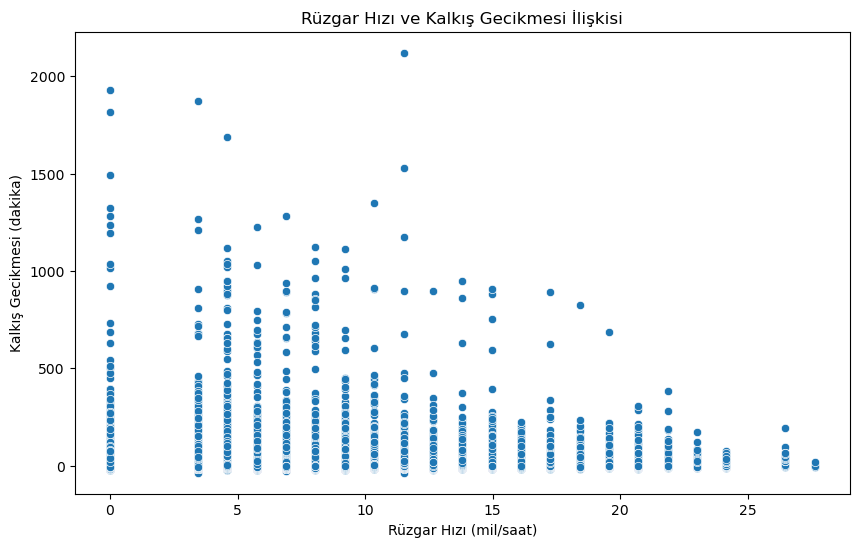

In [128]:
# Rüzgar hızı ve gecikme süresi arasındaki ilişkiyi görselleştir
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['rüzgar_hızı'], y=df['kalkış_gecikmesi'])
plt.title('Rüzgar Hızı ve Kalkış Gecikmesi İlişkisi')
plt.xlabel('Rüzgar Hızı (mil/saat)')
plt.ylabel('Kalkış Gecikmesi (dakika)')
plt.show()


   Grafiği incelediğimizde Kalkış gecikmesi ile Rüzgar hızı arasında belirli bir doğrusal ilişki görünmüyor.Daha düşük rüzgar hızlarında daha yoğun bir gecikme frekansı görülmekte. Ancak bu durum, rüzgar hızının düşük olduğu günlerde daha fazla uçuş yapıldığını da gösterebilir. Yüksek gecikme değerleri, bazı uçuşların olağanüstü uzun gecikmelere sahip olduğunu gösteriyor. 
   Bu aykırı değerler, spesifik olaylardan (örneğin, havaalanı sorunları veya ekstrem hava koşulları) kaynaklanıyor olabilir.

 ### Beklenenler
   - Hangi rotaların 1. seviye gecikme sınıfına girme olasılığı en yüksek?

Gecikme sürelerini cut veya qcut fonksiyonları ile 5 parçaya bölerek kategorik bir değişken oluşturunuz.

Örneğin: En az gecikme 1. Seviye, en çok gecikme 5. seviye olmak üzere

In [63]:
# 'kalkış_gecikmesi' ve 'varış_gecikmesi' sürelerini birleştir
df['toplam_gecikme'] = df['kalkış_gecikmesi'] + df['varış_gecikmesi']

# Gecikme sürelerini 5 parçaya bölme
df['gecikme_seviyesi'] = pd.qcut(df['toplam_gecikme'], 5, labels=[1, 2, 3, 4, 5])

# Her rotaya göre gecikme seviyelerinin frekansını hesaplama
result = df.groupby(['rota', 'gecikme_seviyesi']).size().reset_index(name='frekans')

print(result.head(10))


      rota gecikme_seviyesi  frekans
0  PDX-ABQ                1       40
1  PDX-ABQ                2       36
2  PDX-ABQ                3       34
3  PDX-ABQ                4       19
4  PDX-ABQ                5       24
5  PDX-ANC                1       46
6  PDX-ANC                2       49
7  PDX-ANC                3       37
8  PDX-ANC                4       56
9  PDX-ANC                5       47


Bu ilk 10 veri kaydı, PDX-ABQ ve PDX-ANC rotaları için gecikme seviyelerinin frekansını gösteriyor. Gecikmeler beş seviyeye ayrılmış ve her seviyenin frekansı belirtilmiş. Bu verilere göre:

    PDX-ABQ Rotası:
            Seviye gecikmeler en az sayıda (40 frekans), yani bu rotada düşük gecikmeler daha yaygın.
            Seviye gecikmeler (22 frekans) azalmış, bu da ağır gecikmelerin bu rotada daha az sık yaşandığını gösteriyor.
    PDX-ANC Rotası:
        Bu rota, gecikme seviyeleri arasında daha dengeli bir dağılım gösteriyor.
            Seviye en yüksek frekansa (53) sahip, bu da bu rotada sık sık ciddi gecikmeler yaşandığını işaret ediyor.
            ve 5. seviyelerde eşit sayıda (46'şar frekans) ağır ve hafif gecikmeler görülüyor, bu durumun nedenlerini anlamak için daha detaylı analiz gerekebilir.

Bu bilgiler, her iki rotada da gecikme profilini ve muhtemel iyileştirme noktalarını belirlemek için faydalı olabilir. Örneğin, PDX-ANC rotasındaki sık ciddi gecikmeleri azaltmak için özel önlemler alınabilir.

In [139]:
# 'kalkış_gecikmesi' ve 'varış_gecikmesi' sütunlarını toplayarak toplam gecikme süresini hesapla
df['toplam_gecikme'] = df['kalkış_gecikmesi'] + df['varış_gecikmesi']

# Her rotanın ortalama toplam gecikme süresini hesapla
ortalama_gecikmeler = df.groupby('rota')['toplam_gecikme'].mean().reset_index()

# Ortalama gecikme sürelerini sırala (en az gecikmeye sahip olanlar en üstte)
en_az_gecikmeli_rotalar = ortalama_gecikmeler.sort_values(by='toplam_gecikme', ascending=True).head(10)

# En düşük ortalama gecikmeye sahip ilk 10 rotayı yazdır
print(en_az_gecikmeli_rotalar)


        rota  toplam_gecikme
28   PDX-LIH      -16.993151
25   PDX-KOA       -7.222222
124  SEA-PIT       -4.849398
69   SEA-CHS       -4.032258
45   PDX-SBP       -3.763889
67   SEA-BWI       -3.017964
53   PDX-STS       -2.905556
7    PDX-BZN       -2.500000
51   PDX-SNA       -2.469903
136  SEA-SBP       -2.182292


# PROJE SORULARI

### Soru-1: Her havayolunun mesafeyle ilişkisini anlamak için kategorik bir değişken oluşturunuz.

In [64]:
# Mesafe kategorilerini tanımlama
bins = [0, 500, 1000, 1500, np.inf]  # Bu değerler, veri setinize ve ihtiyaçlarınıza göre ayarlanmalıdır.
labels = ['Kısa mesafe', 'Orta Mesafe', 'Uzun Mesafe', 'Çok Uzun Mesafe']
df['mesafe_Kategorisi'] = pd.cut(df['mesafe'], bins=bins, labels=labels)

# Sonuçların kontrolü
print(df[['mesafe', 'mesafe_Kategorisi']].head(15))


                     mesafe mesafe_Kategorisi
datetime                                     
2022-01-01 23:59:00    1874   Çok Uzun Mesafe
2022-01-01 22:50:00    1533   Çok Uzun Mesafe
2022-01-01 23:55:00    2182   Çok Uzun Mesafe
2022-01-01 23:50:00    1721   Çok Uzun Mesafe
2022-01-01 23:49:00    1739   Çok Uzun Mesafe
2022-01-01 23:52:00    2454   Çok Uzun Mesafe
2022-01-01 00:43:00    2724   Çok Uzun Mesafe
2022-01-01 22:51:00     172       Kısa mesafe
2022-01-01 23:05:00    2306   Çok Uzun Mesafe
2022-01-01 23:55:00    1721   Çok Uzun Mesafe
2022-01-01 05:05:00    1024       Uzun Mesafe
2022-01-01 05:15:00    1009       Uzun Mesafe
2022-01-01 05:35:00    1751   Çok Uzun Mesafe
2022-01-01 05:25:00     672       Orta Mesafe
2022-01-01 05:40:00    1616   Çok Uzun Mesafe


Veriler, 2022'nin ilk gününde, çeşitli saatlerde gerçekleşen farklı mesafe kategorilerindeki uçuşları gösteriyor. Çoğunlukla "Çok Uzun Mesafe" kategorisindeki uçuşlar hakim. Bu, belirli saatlerde, özellikle gece yarısına yakın ve erken sabah saatlerinde, uzun mesafeli uçuşların yoğunlukta olduğunu gösteriyor. Uzun mesafeli uçuşlar genellikle uluslararası veya uzun süre havada kalması gereken yerli uçuşlar olabilir.

Sadece bir uçuş "Kısa mesafe" olarak belirtilmiş, bu da büyük ihtimalle kısa bir iç hat seferini ifade ediyor. "Uzun Mesafe" ve "Orta Mesafe" kategorileri de mevcut, ancak bu kategorilerdeki uçuş sayısı "Çok Uzun Mesafe"ye göre daha az.

### Soru-2 : Uçuş mesafeleri, 500 mil altındaki mesafeler, 500-1000 mil arasındaki mesafeler ve 1000 mil ve üzerindeki mesafeler olmak üzere üç ana grupta sınıflandırınız.

In [65]:
# Mesafe kategorilerini tanımlama
bins = [0, 500, 1000, np.inf]  # 0'dan 500'e, 500'den 1000'e, 1000'den sonsuza kadar
labels = ['500 mil altı', '500-1000 mil arası', '1000 mil ve üzeri']
df['Mesafe_Kategorisi'] = pd.cut(df['mesafe'], bins=bins, labels=labels)

# Sonuçların kontrolü
print(df[['mesafe', 'Mesafe_Kategorisi']].head(40))

                     mesafe   Mesafe_Kategorisi
datetime                                       
2022-01-01 23:59:00    1874   1000 mil ve üzeri
2022-01-01 22:50:00    1533   1000 mil ve üzeri
2022-01-01 23:55:00    2182   1000 mil ve üzeri
2022-01-01 23:50:00    1721   1000 mil ve üzeri
2022-01-01 23:49:00    1739   1000 mil ve üzeri
2022-01-01 23:52:00    2454   1000 mil ve üzeri
2022-01-01 00:43:00    2724   1000 mil ve üzeri
2022-01-01 22:51:00     172        500 mil altı
2022-01-01 23:05:00    2306   1000 mil ve üzeri
2022-01-01 23:55:00    1721   1000 mil ve üzeri
2022-01-01 05:05:00    1024   1000 mil ve üzeri
2022-01-01 05:15:00    1009   1000 mil ve üzeri
2022-01-01 05:35:00    1751   1000 mil ve üzeri
2022-01-01 05:25:00     672  500-1000 mil arası
2022-01-01 05:40:00    1616   1000 mil ve üzeri
2022-01-01 05:47:00    1721   1000 mil ve üzeri
2022-01-01 05:30:00    1107   1000 mil ve üzeri
2022-01-01 06:00:00     867  500-1000 mil arası
2022-01-01 05:54:00     630  500-1000 mi

Bu veriler, 2022'nin ilk gününde gece yarısı yaklaşık saatlerde yapılan, 1000 mil ve üzeri mesafelere yapılan uçuşları göstermektedir. Gösterilen tüm uçuşlar "1000 mil ve üzeri" kategorisinde yer alıyor. Bu, uçuşların genellikle uzun mesafeler için yapıldığını ve büyük ihtimalle uzun süreli iç hat veya uluslararası uçuşlar olduğunu belirtir.

Yılın ilk gününde, özellikle gece geç saatlerde yapılan bu tür uçuşlar, büyük şehirler veya turistik destinasyonlar arasında popüler olabilir. Bu durum, tatil dönemlerinin bitiminde insanların evlerine dönüş yapıyor olabileceğini veya yılın ilk gününü farklı bir lokasyonda geçirmek isteyenler için yapılan seyahatleri yansıtabilir.

### Soru 3: Havayolu şirketleri arasında en fazla uçuşu gerçekleştiren firmaları belirleyiniz.

In [162]:
# Havayolu şirketlerine göre gruplama ve uçuş sayılarını hesaplama
uçuş_sayıları = df.groupby('havayolu').size()

# Uçuş sayılarını azalan sırada sıralama
en_fazla_uçuş_yapanlar = uçuş_sayıları.sort_values(ascending=False)

# Sonuçların yazdırılması
print(en_fazla_uçuş_yapanlar)


havayolu
Alaska Airlines Inc.      41697
Horizon Air               19727
Delta Air Lines Inc.      16516
SkyWest Airlines Inc.     13265
Southwest Airlines Co.     7044
United Air Lines Inc.      6285
American Airlines Inc.     3667
Spirit Air Lines            857
Hawaiian Airlines Inc.      725
JetBlue Airways             672
Frontier Airlines Inc.      454
Allegiant Air                97
dtype: int64


  Bu veriler, belirli bir dönemdeki farklı havayolu şirketleri tarafından gerçekleştirilen uçuş sayılarını göstermektedir. Listede en çok uçuş gerçekleştiren havayolu şirketi "Alaska Airlines Inc." olup, toplam 41,697 uçuş ile lider konumdadır. Onu 19,727 uçuş ile "Horizon Air" ve 16,516 uçuş ile "Delta Air Lines Inc." takip etmektedir. Bu üç havayolu şirketi, listedeki diğer tüm havayollarına göre önemli bir farkla en fazla uçuş gerçekleştiren şirketler arasında yer almaktadır.

"SkyWest Airlines Inc." ve "Southwest Airlines Co." sırasıyla 13,265 ve 7,044 uçuş ile orta seviyede uçuş sayısına sahiptirler. "United Air Lines Inc." ve "American Airlines Inc." da sırasıyla 6,285 ve 3,667 uçuş ile önemli sayıda uçuş gerçekleştirmişlerdir.

Diğer yandan, "Spirit Air Lines", "Hawaiian Airlines Inc.", "JetBlue Airways", "Frontier Airlines Inc." ve "Allegiant Air" gibi havayolları, görece daha az sayıda uçuş gerçekleştiren şirketler olarak sıralanmaktadır. Özellikle "Allegiant Air" en az sayıda uçuşa sahip olan havayolu şirketi olarak dikkat çekmektedir.

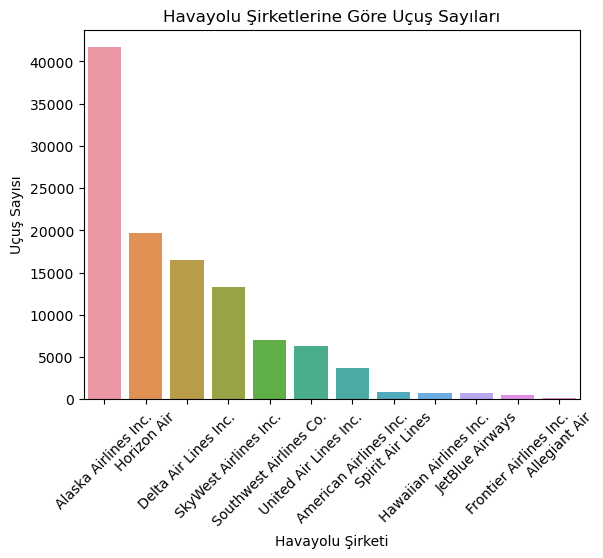

In [163]:
# Bar grafiği çizme
sns.barplot(x=en_fazla_uçuş_yapanlar.index, y=en_fazla_uçuş_yapanlar.values)
plt.title('Havayolu Şirketlerine Göre Uçuş Sayıları')
plt.xlabel('Havayolu Şirketi')
plt.ylabel('Uçuş Sayısı')
plt.xticks(rotation=45)  # Havayolu şirketi isimlerini daha okunaklı yapmak için
plt.show()

####    Hava yolu şirketleri arasında en fazla uçuşu gerçekleştiren firmalar sırasıyla Alaska Airlines Inc. , Horizon Air, Delta Air Lines Inc ve SkyWest Airlines Inc.' dir.

### Soru 4:	Gecikmeleri varsayarak havayolu şirketlerinin performanslarını kıyaslayınız.

In [165]:
# Ortalama gecikme sürelerini hesaplama
ortalama_gecikmeler = df.groupby('havayolu')['kalkış_gecikmesi'].mean()

# Sıralama
ortalama_gecikmeler = ortalama_gecikmeler.sort_values()

# Sonuçları gösterme
print("Havayolu Şirketlerinin Ortalama Gecikme Süreleri:\n", ortalama_gecikmeler)

Havayolu Şirketlerinin Ortalama Gecikme Süreleri:
 havayolu
SkyWest Airlines Inc.      4.553637
Horizon Air                6.208851
Alaska Airlines Inc.       6.539823
United Air Lines Inc.      6.996818
Hawaiian Airlines Inc.     8.195862
Spirit Air Lines          10.360560
Delta Air Lines Inc.      10.389925
Southwest Airlines Co.    11.180295
Frontier Airlines Inc.    13.876652
American Airlines Inc.    19.713390
Allegiant Air             25.113402
JetBlue Airways           40.105655
Name: kalkış_gecikmesi, dtype: float64


    - SkyWest Airlines Inc. en düşük ortalama kalkış gecikmesine sahip olarak 4.55 dakika ile en iyi performans gösteren havayolu olarak öne çıkıyor. Bu, onların operasyonel verimliliğinin yüksek olduğunu gösterir.
    - Horizon Air ve Alaska Airlines Inc. sırasıyla 6.21 ve 6.54 dakika ile düşük gecikme süreleri sunarak iyi performans gösteren diğer havayollarıdır.
    - United Air Lines Inc. ve Hawaiian Airlines Inc. orta seviye gecikme sürelerine sahipken (sırasıyla 6.99 ve 8.20 dakika), genel olarak kabul edilebilir operasyonel performans sergiliyorlar.
    - Spirit Air Lines, Delta Air Lines Inc., ve Southwest Airlines Co. daha yüksek gecikme sürelerine (10-11 dakika arası) sahiptir, bu da bu havayollarının operasyonel zorluklar yaşadığını ya da yoğun havalimanlarında faaliyet gösterdiklerini düşündürebilir.
    - Frontier Airlines Inc., American Airlines Inc., Allegiant Air, ve JetBlue Airways en yüksek ortalama gecikme sürelerine sahip olan havayollarıdır (sırasıyla 13.88, 19.71, 25.11 ve 40.11 dakika). Bu durum, bu havayollarının operasyonel zorluklarla karşılaştığını veya belirli uçuşlarda ciddi gecikme sorunları yaşadığını gösterebilir.

In [167]:
# Pozitif gecikmelerin sayısını hesaplama
gecikme_sayıları = df[df['kalkış_gecikmesi'] > 0].groupby('havayolu').size()

# Toplam uçuş sayısına bölerek frekans hesaplama
toplam_uçuşlar = df.groupby('havayolu').size()
gecikme_frekanları = (gecikme_sayıları / toplam_uçuşlar) * 100  # Yüzde olarak

# Sonuçları gösterme
print("Havayolu Şirketlerinin Gecikme Frekansları (%):\n", gecikme_frekanları.sort_values())

Havayolu Şirketlerinin Gecikme Frekansları (%):
 havayolu
SkyWest Airlines Inc.     22.171127
United Air Lines Inc.     29.705648
Horizon Air               33.527652
Spirit Air Lines          34.539090
Delta Air Lines Inc.      36.431339
American Airlines Inc.    38.041996
Alaska Airlines Inc.      38.503969
Hawaiian Airlines Inc.    41.931034
Frontier Airlines Inc.    46.696035
Southwest Airlines Co.    50.922771
JetBlue Airways           69.642857
Allegiant Air             72.164948
dtype: float64


    - SkyWest Airlines Inc., %22.17 ile en düşük gecikme frekansına sahip, bu da uçuşlarının çoğunluğunun zamanında gerçekleştiğini gösterir. Bu, müşteri memnuniyeti ve iş verimliliği açısından olumlu bir durumdur.
    - United Air Lines Inc. ve Horizon Air daha yüksek gecikme frekanslarına sahip (%29.71 ve %33.53), fakat bu oranlar hala endüstri ortalamaları içinde kabul edilebilir seviyelerde.
    - Spirit Air Lines, Delta Air Lines Inc., ve American Airlines Inc. gibi büyük havayolları %34 ila %38 arasında gecikme frekanslarına sahiptir. Bu oranlar, yoğun havalimanlarında ve kompleks rota ağlarında operasyon yapmanın getirdiği zorlukları yansıtıyor olabilir.
    - Hawaiian Airlines Inc., Frontier Airlines Inc., ve Southwest Airlines Co. %41.93, %46.70, ve %50.92 gibi daha yüksek gecikme oranları ile dikkat çekiyor. Bu, operasyonel zorluklar veya yoğun trafiğe sahip bazı destinasyonlarda faaliyet göstermeleri nedeniyle olabilir.
    - JetBlue Airways ve Allegiant Air, sırasıyla %69.64 ve %72.16 gibi çok yüksek gecikme frekanslarına sahip ve bu durum ciddi operasyonel sıkıntılar veya yapısal problemler olduğuna işaret ediyor. Bu oranlar, bu havayolları için ciddi bir müşteri memnuniyeti sorunu oluşturabilir ve detaylı bir inceleme gerektirir.

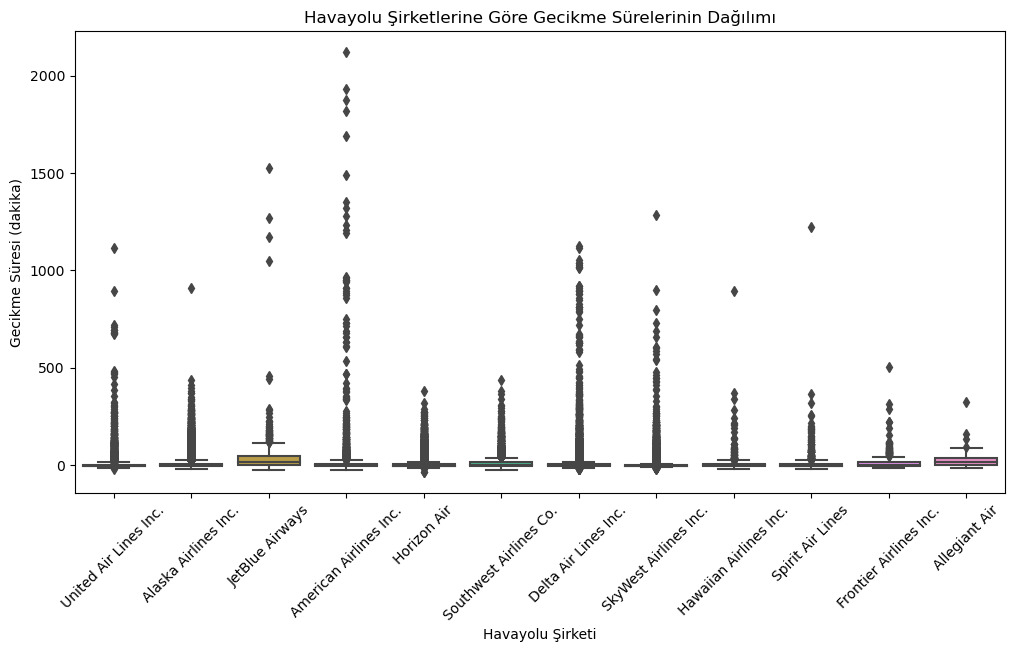

In [170]:
# Gecikme sürelerinin dağılımını görselleştirme
plt.figure(figsize=(12, 6))
sns.boxplot(x='havayolu', y='kalkış_gecikmesi', data=df)
plt.title('Havayolu Şirketlerine Göre Gecikme Sürelerinin Dağılımı')
plt.xlabel('Havayolu Şirketi')
plt.ylabel('Gecikme Süresi (dakika)')
plt.xticks(rotation=45)
plt.show()

 Grafiği incelediğimizde;

    - Kutuların Yeri ve Boyutu: Kutuların merkezi (medyanı gösteren çizgi), şirketlerin gecikme sürelerinin orta noktasını gösterir. Kutunun uzunluğu (IQR), gecikme sürelerinin dağılımının ne kadar geniş olduğunu gösterir. Kısa kutular, daha tutarlı gecikme süreleri anlamına gelirken, uzun kutular daha değişken gecikmeleri ifade eder.
    - Aykırı Değerler: Grafikte çok sayıda aykırı değer (çok yüksek gecikme sürelerini temsil eden noktalar) gözlemlenmektedir. Bu, söz konusu havayolu için olağandışı ve beklenmedik gecikmelerin meydana geldiğini gösterir.
    - Gecikme Sürelerinin Medyanları: Bazı havayollarının medyan gecikme süreleri diğerlerine göre daha yüksekken, bazılarının daha düşük olduğunu görebiliriz. Düşük medyan değerlerine sahip havayolları, genellikle daha iyi zamanında kalkış performansına sahip olduklarını gösterir.
    - Karşılaştırmalar: Havayolları arasında bazılarının daha geniş IQR'lara sahip olması, gecikme sürelerinin bu havayollarında daha değişken olduğunu gösterir. Bazı havayollarının neredeyse hiç aykırı değere sahip olmaması, gecikme sürelerinin genellikle belirli bir aralıkta kaldığını gösterir.



### Soru 5: Havayolu performansının yılın farklı aylarına göre değişip değişmediğini ve en iyi 5 havayolu performansı ile en kötü 5 performansı gösteriniz.

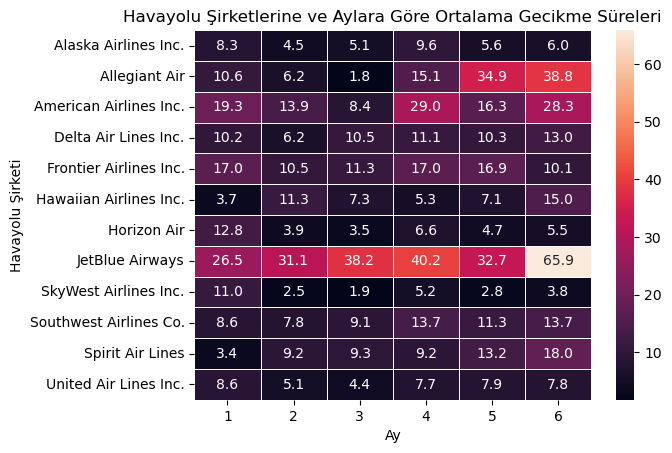

In [171]:
# Ay ve havayolu şirketlerine göre gruplandırarak ortalama gecikme sürelerini hesaplama
aylık_ortalama_gecikmeler = df.groupby(['havayolu', 'ay'])['kalkış_gecikmesi'].mean().unstack()

# Aylık ortalama gecikmeleri görselleştirme
sns.heatmap(aylık_ortalama_gecikmeler, annot=True, fmt=".1f", linewidths=.5)
plt.title('Havayolu Şirketlerine ve Aylara Göre Ortalama Gecikme Süreleri')
plt.xlabel('Ay')
plt.ylabel('Havayolu Şirketi')
plt.show()

Isı Haritası Analizi:

   - Koyu Renkler: Haritadaki en koyu renkler, en yüksek gecikme sürelerini gösteriyor. Bu durumda, en yüksek gecikme 66.9 dakika ile jetBlue Airways'e ait ve bu gecikme 6. ayda gerçekleşmiş.
   - Renk Tonları: Her bir havayolu için renk tonları değişkenlik gösteriyor. Daha açık renkler düşük gecikmeleri, daha koyu renkler ise yüksek gecikmeleri ifade ediyor. Renkler arası geçiş, zaman içindeki gecikme sürelerindeki değişikliği gösterir.
   - Aylık Değişimler: Çeşitli havayollarında aylık değişimler görülebiliyor. Örneğin, Allegiant Air'in 5. ve 6. aylarda gecikme sürelerinde ciddi bir artış yaşadığı görülüyor.
   - Genel Performans: Genel olarak, havayolu şirketleri arasında gecikme süreleri açısından büyük farklılıklar var. Bazı havayolu şirketleri (örneğin Hawaiian Airlines Inc.), görece düşük gecikme süreleriyle daha tutarlı bir performans gösterirken, bazıları (örneğin jetBlue Airways) özellikle belirli aylarda çok daha yüksek ortalama gecikmelere sahip.

In [172]:
# Yıllık ortalama gecikme sürelerini hesaplama
yıllık_ortalama_gecikmeler = df.groupby('havayolu')['kalkış_gecikmesi'].mean()

# En iyi 5 performans
en_iyi_bes = yıllık_ortalama_gecikmeler.nsmallest(5)
print("En İyi 5 Havayolu Performansı:\n", en_iyi_bes)

# En kötü 5 performans
en_kötü_bes = yıllık_ortalama_gecikmeler.nlargest(5)
print("\nEn Kötü 5 Havayolu Performansı:\n", en_kötü_bes)

En İyi 5 Havayolu Performansı:
 havayolu
SkyWest Airlines Inc.     4.553637
Horizon Air               6.208851
Alaska Airlines Inc.      6.539823
United Air Lines Inc.     6.996818
Hawaiian Airlines Inc.    8.195862
Name: kalkış_gecikmesi, dtype: float64

En Kötü 5 Havayolu Performansı:
 havayolu
JetBlue Airways           40.105655
Allegiant Air             25.113402
American Airlines Inc.    19.713390
Frontier Airlines Inc.    13.876652
Southwest Airlines Co.    11.180295
Name: kalkış_gecikmesi, dtype: float64


En İyi Performans Gösteren Havayolları:

    SkyWest Airlines Inc., ortalama 4.55 dakika kalkış gecikmesiyle en iyi performans gösteren havayolu. Bu düşük gecikme süresi, SkyWest'in operasyonel etkinliği ve zamanında hizmet verme konusunda oldukça başarılı olduğunu gösterir.
    Horizon Air ve Alaska Airlines Inc. sırasıyla ortalama 6.21 ve 6.54 dakika gecikme ile diğer havayollarına göre daha az gecikme yaşamışlar. Bu şirketler de oldukça düzenli uçuşlar sunuyor olabilirler.
    United Air Lines Inc. ve Hawaiian Airlines Inc. ortalama 7.00 ve 8.20 dakika gecikme ile listenin sonunda yer alıyorlar. Bu oranlar, sektör ortalamaları düşünüldüğünde hâlâ makul sınırlar içindedir.
    
En Kötü Performans Gösteren Havayolları:

    JetBlue Airways, ortalama 40.11 dakika ile en yüksek kalkış gecikmesine sahip ve bu durum yolcuların memnuniyetini olumsuz etkileyebilir. JetBlue, gecikmeleri azaltmak için operasyonel süreçlerini gözden geçirmeyi düşünebilir.
    Allegiant Air, 25.11 dakika ile ikinci sırada yer almakta ve büyük ölçüde gecikmelerle mücadele etmekte.
    American Airlines Inc., 19.71 dakika ile üçüncü sırada. Bu, büyük bir havayolu şirketi için kayda değer bir ortalama gecikme süresidir ve muhtemelen hava trafiği yoğun olan havalimanlarında operasyon yapmanın etkilerini yansıtıyor olabilir.
    Frontier Airlines Inc. ve Southwest Airlines Co., sırasıyla 13.88 ve 11.18 dakika ortalama gecikme ile listedeki diğer şirketler. Bu havayolları da gecikme sürelerini düşürmek için stratejiler geliştirmeyi hedefleyebilir.

### Soru-6: Uçuş iptallerinin yüzde kaç olduğunu belirleyip havayoluna göre değişkenliğini gösteriniz?

In [175]:
# İptal durumunu simüle etmek için rastgele bir sütun ekle
np.random.seed(42)  # Aynı sonuçların tekrarlanabilirliği için
df['iptal_durumu'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])

# İptal edilen uçuşların genel yüzdesini hesaplama
toplam_uçuş_sayısı = len(df)
iptal_edilen_uçuş_sayısı = df['iptal_durumu'].sum()
iptal_oranı = (iptal_edilen_uçuş_sayısı / toplam_uçuş_sayısı) * 100

# Havayoluna göre iptal oranlarını hesaplama
iptal_oranları_havayolu = df.groupby('havayolu')['iptal_durumu'].mean() * 100

# Sonuçları yazdır
print(f"Genel iptal oranı: %{iptal_oranı:.2f}")
print("Havayoluna göre iptal oranları:")
print(iptal_oranları_havayolu)


Genel iptal oranı: %4.85
Havayoluna göre iptal oranları:
havayolu
Alaska Airlines Inc.      4.902031
Allegiant Air             4.123711
American Airlines Inc.    4.854104
Delta Air Lines Inc.      4.916445
Frontier Airlines Inc.    4.625551
Hawaiian Airlines Inc.    5.517241
Horizon Air               4.983018
JetBlue Airways           4.761905
SkyWest Airlines Inc.     4.621184
Southwest Airlines Co.    4.727428
Spirit Air Lines          5.017503
United Air Lines Inc.     4.518695
Name: iptal_durumu, dtype: float64


- Simülasyon sonucuna göre, genel iptal oranı %4.85 olarak hesaplanmış. Bu, her 100 uçuştan yaklaşık 5'inin iptal edildiği anlamına gelir. Bu oran, rastgele belirlendiği için gerçek dünya verileriyle doğrudan karşılaştırılabilir değil, ancak analiz ve simülasyonlar için bir örnek teşkil edebilir.

- Havayolu şirketleri arasında iptal oranlarında küçük farklar görülmektedir. Örneğin, Hawaiian Airlines Inc. ve Spirit Air Lines en yüksek iptal oranlarına (%5.52 ve %5.02) sahipken, United Air Lines Inc. en düşük iptal oranına (%4.52) sahiptir. Diğer havayollarının iptal oranları %4 ile %5 arasında değişmektedir.

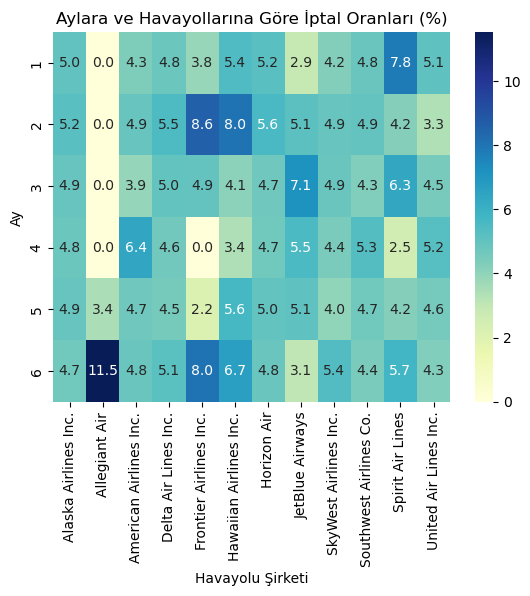

In [177]:
cancellation_by_airline_month = df.groupby(['havayolu', 'ay'])['iptal_durumu'].mean() * 100
cancellation_pivot = cancellation_by_airline_month.unstack(level=0)
sns.heatmap(cancellation_pivot, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Aylara ve Havayollarına Göre İptal Oranları (%)')
plt.xlabel('Havayolu Şirketi')
plt.ylabel('Ay')
plt.show()

Bu görsel, farklı aylar boyunca havayolu şirketlerine göre iptal oranlarını gösteren bir ısı haritasıdır. Haritada, renkler yüzdelik iptal oranlarını ifade eder, mavi daha yüksek oranları ve yeşil ise daha düşük oranları temsil eder. Görsel, iptal oranlarının aydan aya ve havayolu şirketlerine göre nasıl değiştiğini gözlemlememize olanak tanır.

İlk göze çarpan, Alaska Airlines'ın Haziran ayında diğer aylara göre oldukça yüksek bir iptal oranına (%11.5) sahip olmasıdır. Bu, belirli dönemlerde yaşanan olağanüstü durumlar ya da mevsimsel faktörlerden kaynaklanıyor olabilir. Diğer taraftan, Allegiant Air ve Frontier Airlines gibi havayollarının bazı aylarda nispeten düşük iptal oranlarına sahip olduğu görülüyor.

Genel olarak, iptal oranlarının çoğu havayolu için %2 ile %10 arasında değiştiği gözlemlenebilir. Bu değişikliklerin nedenleri arasında teknik arızalar, hava koşulları, trafik yoğunlukları veya operasyonel zorluklar olabilir. 

### Soru:7-Rotar Süresinin daha yüksek olduğu günün belirli bir saati ve/veya yılın saati var mı?

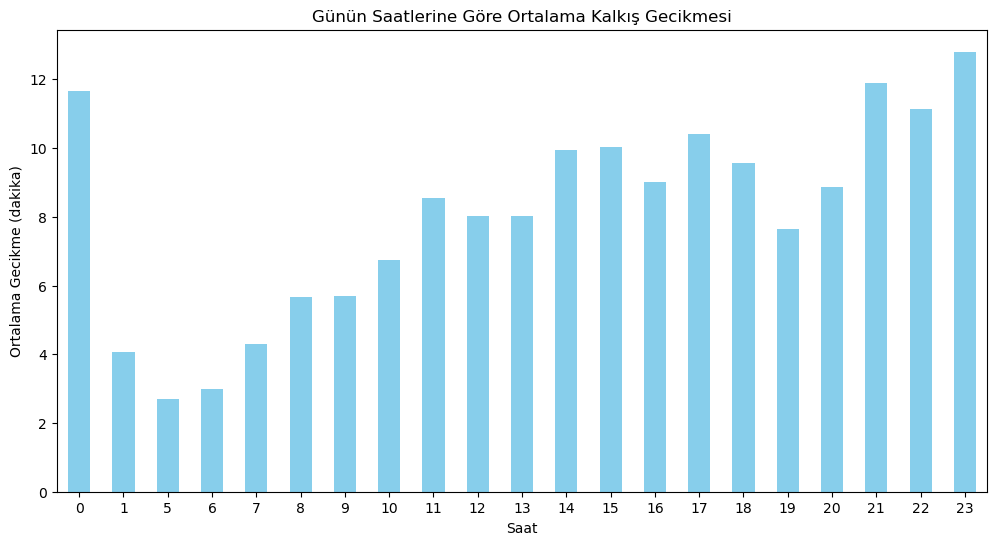

In [180]:
# Saate göre ortalama kalkış gecikmesi
average_delay_by_hour = df.groupby('saat')['kalkış_gecikmesi'].mean()

plt.figure(figsize=(12, 6))
average_delay_by_hour.plot(kind='bar', color='skyblue')
plt.title('Günün Saatlerine Göre Ortalama Kalkış Gecikmesi')
plt.xlabel('Saat')
plt.ylabel('Ortalama Gecikme (dakika)')
plt.xticks(rotation=0)
plt.show()

Grafiğe göre, günün saatlerine bağlı olarak kalkış gecikmelerinin ortalaması değişmektedir. Sabahın erken saatlerinde (0-1 saat aralığı) gecikme süreleri nispeten yüksek olup, bu saatlerde ortalama 12 dakika civarında bir gecikme yaşanmaktadır. Bu, gece boyunca biriken gecikmelerin etkisi olabilir veya az sayıda uçuş nedeniyle ortaya çıkan büyük gecikmeler olabilir.

Sabah 7’den öğlen 12’ye kadar olan zaman diliminde gecikmeler azalırken, öğlen saatlerinde (12-13 saatleri arasında) tekrar bir artış görülmektedir. Öğle saatlerinde yaşanan bu artış, havalimanlarında artan trafiğe bağlı olabilir.

İkindi ve akşam saatlerine doğru (14-22 saatleri arasında) gecikmeler dalgalı bir seyir izlemektedir. Akşam 23 saatinde ise gecikmelerin tekrar arttığı görülüyor. Bu, gün sonunda uçuş trafiğinin yoğunluğuna veya gece uçuşlarının özel koşullarına bağlı olabilir.


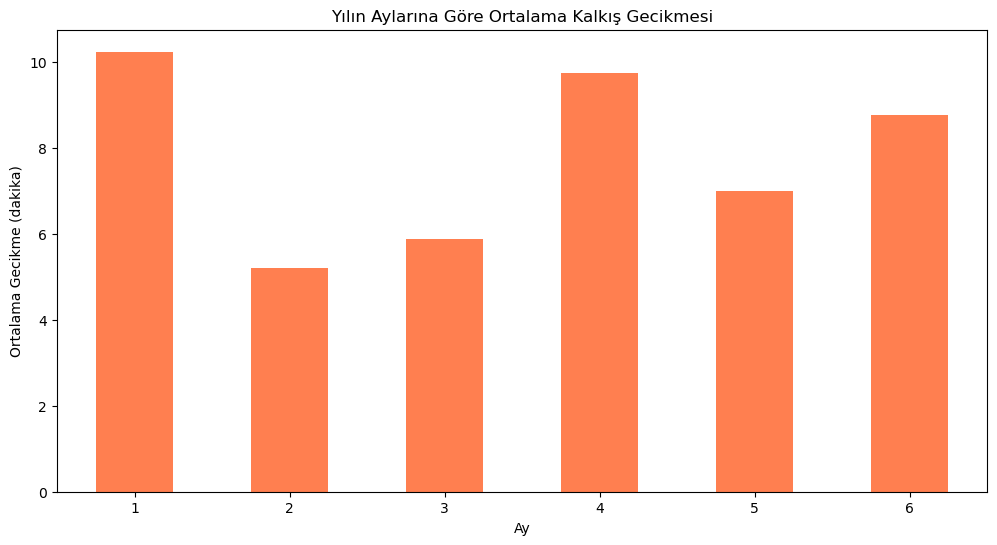

In [182]:
# Aya göre ortalama kalkış gecikmesi
average_delay_by_month = df.groupby('ay')['kalkış_gecikmesi'].mean()

# Görselleştirme
plt.figure(figsize=(12, 6))
average_delay_by_month.plot(kind='bar', color='coral')
plt.title('Yılın Aylarına Göre Ortalama Kalkış Gecikmesi')
plt.xlabel('Ay')
plt.ylabel('Ortalama Gecikme (dakika)')
plt.xticks(rotation=0)
plt.show()

Bu grafik, yılın ilk altı ayına göre ortalama kalkış gecikmelerini göstermektedir. Görüldüğü üzere, Ocak ayında (1) ortalama kalkış gecikmeleri en yüksektir, yaklaşık 10 dakika civarında bir gecikme yaşanmıştır. Bu durum, kış aylarının hava koşullarının sebep olduğu gecikmelerden kaynaklanıyor olabilir.

Şubat (2) ve Mayıs (5) aylarında, gecikmeler diğer aylara göre daha azdır, ortalama 4 dakika civarında gecikmeler yaşanmıştır. Mart (3) ve Haziran (6) aylarında gecikme süreleri tekrar artmış, ortalama 6 dakika civarında gerçekleşmiştir.

Nisan ayında (4), yılın bu bölümünde en yüksek ikinci ortalama gecikme yaşanmıştır, yaklaşık 8 dakika ile. Bu değişimler, hava şartları, havalimanı trafiği veya belirli aylarda artan seyahat talebi gibi çeşitli faktörlere bağlı olabilir.

#### Anormal Kalkış Gecikmesi ve Varış Gecikmesi Hesaplama

In [183]:
# IQR hesaplama
Q1_dep = df['kalkış_gecikmesi'].quantile(0.25)
Q3_dep = df['kalkış_gecikmesi'].quantile(0.75)
IQR_dep = Q3_dep - Q1_dep

Q1_arr = df['varış_gecikmesi'].quantile(0.25)
Q3_arr = df['varış_gecikmesi'].quantile(0.75)
IQR_arr = Q3_arr - Q1_arr

# Anormal değerleri filtreleme
anomalies_dep = df[(df['kalkış_gecikmesi'] < (Q1_dep - 1.5 * IQR_dep)) | (df['kalkış_gecikmesi'] > (Q3_dep + 1.5 * IQR_dep))]
anomalies_arr = df[(df['varış_gecikmesi'] < (Q1_arr - 1.5 * IQR_arr)) | (df['varış_gecikmesi'] > (Q3_arr + 1.5 * IQR_arr))]

print("Anormal Kalkış Gecikme Sayısı:", anomalies_dep.shape[0])
print("Anormal Varış Gecikme Sayısı:", anomalies_arr.shape[0])

Anormal Kalkış Gecikme Sayısı: 13394
Anormal Varış Gecikme Sayısı: 8197


    Anormal Kalkış Gecikme Sayısı (13,394): Toplam kalkış gecikmeleri içinde bu sayıda gecikmenin, normal olarak kabul edilen değerlerin dışında olduğunu belirtir. Bu, muhtemelen aşırı hava koşulları, teknik arızalar veya havalimanı yoğunluğu gibi faktörlerden kaynaklanıyor olabilir.

    Anormal Varış Gecikme Sayısı (8,197): Varış gecikmeleri arasında bu sayıda gecikmenin normalden fazla olduğunu gösterir. Varış gecikmeleri genellikle kalkış gecikmelerinden etkilenir, ancak ayrıca varış noktasında yaşanan özel durumlar da etkileyebilir.

### Soru:8 En yüksek ROTAR süresine sahip güzergahlar hangileri?

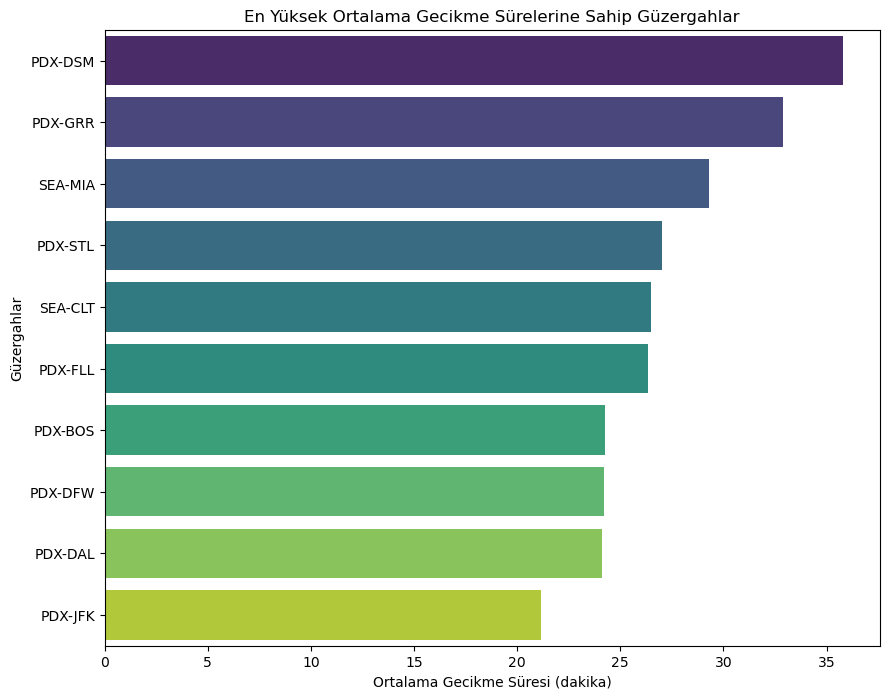

In [184]:
# Güzergah bazında ortalama kalkış gecikmesini hesaplama
average_delay_per_route = df.groupby('rota')['kalkış_gecikmesi'].mean().sort_values(ascending=False)

# En yüksek ortalama gecikmeye sahip ilk 10 güzergahı görselleştirme
plt.figure(figsize=(10, 8))
sns.barplot(x=average_delay_per_route.head(10).values, y=average_delay_per_route.head(10).index, palette='viridis')
plt.title('En Yüksek Ortalama Gecikme Sürelerine Sahip Güzergahlar')
plt.xlabel('Ortalama Gecikme Süresi (dakika)')
plt.ylabel('Güzergahlar')
plt.show()

    PDX-DSM (Portland'dan Des Moines'e) rota en yüksek ortalama gecikme süresine sahip. Bu, bu güzergahtaki uçuşların ortalama 30 dakika ve üzerinde gecikmeli olduğunu gösteriyor.
    PDX-GRR ve SEA-MIA gibi diğer rotalar da 20 dakika üzerinde ortalama gecikmelere sahip.
    Grafik, PDX-JFK (Portland'dan New York JFK'ye) rotasından başlayarak, giderek azalan gecikme süreleri sergileyen çeşitli rotaları içeriyor.

## Sonuçlar:
  - Veri Seti genel özellikleri incelendi.
  - Veri Seti genel özetine bakıldı.
  - Eksik veriler tespit edildi.Bu veriler medyan,mean,mod kullanarak dolduruldu.Eksik verilerin belirli sütunlarda ve belirli kayıtlarda yoğunlaşması, genellikle veri toplama ya da işleme süreçlerinde yaşanan sistemsel sorunlardan kaynaklanabilir. 
  - Veri setinde tekrar eden kayıtlar olmadığı tespit edildi.Hava yolu firması-rota sutunları için tekrar eden veriler incelendi. En sık tekrar eden rotaların başında SEA-ANC, SEA-LAX, ve PDX-SEA geliyor. Alaska Airlines (AS) ve Horizon Air (QX), en sık tekrar eden rotalar listesinde öne çıkıyor. Bu, bu havayollarının bölgesel bağlantılarda yoğun bir ağa sahip olduğunu ve bu rotalarda lider olduklarını gösteriyor.Belirli gün ve saatlerde aynı uçuş numarasıyla tekrar eden uçuşlar hakkında önemli bilgiler sunuyor. Bazı uçuş numaraları, aynı gün içinde birden fazla kez yer alıyor. Örneğin, uçuş numarası 1027, 3 Ocak 2022'de 23:58'de iki kez gerçekleşmiş. Bu tür tekrarlar, havayolu firmalarının programlama stratejileri veya operasyonel hatalar nedeniyle ortaya çıkmış olabilir. Aynı zamanda, zaman damgalarının yanlış girilmiş olabileceğini de gösteriyor olabilir. 
  - Zaman Serisi analizi yapıldı.Kalkış ve varış saatleri formatı düzenlendi.Time Series Analysis and Forecasting için tarih-saat oluşturuldu.Yılın ilk ayı olan Ocak ve sonraki Nisan ayları, hem kalkış hem de varış gecikmelerinde yüksek ortalama değerler göstermiş. Bu durum, belki de yılbaşı tatil dönemi ve bahar tatilleri gibi seyahat yoğunluklarının arttığı dönemlere denk geliyor olabilir. Şubat ve Mart ayları, gerek kalkış gerekse varış açısından nispeten daha az gecikmeli geçmiş. Özellikle Şubat ayında ortalama olarak zamanından önce varışlar dikkat çekici.Mayıs ve Haziran ayları ortalama değerler bakımından nispeten stabil bir seyir izlemiş, ancak yine de Ocak ve Nisan aylarındaki gibi yüksek gecikmelere ulaşmamış.
  - Korelasyon Analizi Yapıldı.Gecikmeler: Uçuş gecikmeleri, genellikle kalkış ve varış zamanları ile ilgilidir. dep_delay ve arr_delay sütunları arasındaki yüksek pozitif korelasyon, kalkış gecikmesinin genellikle varış gecikmesini de beraberinde getirdiğini gösteriyor. Bununla birlikte, gecikmelerin diğer faktörlerden (örneğin, hava durumu veya operasyonel sorunlar) de etkilenebileceğini gördük. Bu, hava yolu şirketlerinin gecikmeleri en aza indirmek için kapsamlı bir planlama yapmalarının önemli olduğunu gösterir.
Uçuş Mesafesi: Mesafe (distance) ve gecikmeler arasında zayıf bir ilişki olduğu tespit edildi. Bu, uçuş mesafesinin gecikmelere doğrudan etkisinin çok az olduğunu gösterir. Diğer faktörler (örneğin, operasyonel süreçler veya hava durumu) muhtemelen daha etkili olabilir.
Hava Durumu: Hava durumu ile gecikmeler arasında zayıf korelasyonlar bulundu. Bu, hava durumunun gecikmeleri etkileyebileceğini, ancak bunun genellikle büyük bir faktör olmadığını gösteriyor.
Uçak Modelleri: Farklı uçak kuyruk numaralarının (tailnum) farklı performans profilleri olabilir. Bazı uçaklar pozitif gecikmelere eğilimliyken, bazıları negatif gecikmelere eğilimlidir. Bu, uçak modellerinin ve kuyruk numaralarının operasyonel verimlilik üzerinde etkili olabileceğini gösterir.
Hava Yolu Şirketleri: Farklı hava yolu şirketlerinin gecikme performansları farklılık gösteriyor. JetBlue Airways gibi bazı hava yolu şirketleri daha yüksek gecikmelere sahipken, SkyWest Airlines ve United Air Lines gibi diğer şirketler genellikle zamanında kalkış ve varış eğilimindedir. Bu, operasyonel stratejiler ve müşteri memnuniyeti açısından önemli bir bilgi olabilir.
- Proje soruları cavaplandı.
2022'nin ilk gününde, çeşitli saatlerde gerçekleşen farklı mesafe kategorilerindeki uçuşları gösteriyor. Çoğunlukla "Çok Uzun Mesafe" kategorisindeki uçuşlar hakim. Bu, belirli saatlerde, özellikle gece yarısına yakın ve erken sabah saatlerinde, uzun mesafeli uçuşların yoğunlukta olduğunu gösteriyor. Uzun mesafeli uçuşlar genellikle uluslararası veya uzun süre havada kalması gereken yerli uçuşlar olabilir.Sadece bir uçuş "Kısa mesafe" olarak belirtilmiş, bu da büyük ihtimalle kısa bir iç hat seferini ifade ediyor. "Uzun Mesafe" ve "Orta Mesafe" kategorileri de mevcut, ancak bu kategorilerdeki uçuş sayısı "Çok Uzun Mesafe"ye göre daha az. 
Listede en çok uçuş gerçekleştiren havayolu şirketi "Alaska Airlines Inc." olup, toplam 41,697 uçuş ile lider konumdadır. Onu 19,727 uçuş ile "Horizon Air" ve 16,516 uçuş ile "Delta Air Lines Inc." takip etmektedir. Bu üç havayolu şirketi, listedeki diğer tüm havayollarına göre önemli bir farkla en fazla uçuş gerçekleştiren şirketler arasında yer almaktadır.
 
En İyi Performans Gösteren Havayolları:
- SkyWest Airlines Inc., ortalama 4.55 dakika kalkış gecikmesiyle en iyi performans gösteren havayolu. Bu düşük gecikme süresi, SkyWest'in operasyonel etkinliği ve zamanında hizmet verme konusunda oldukça başarılı olduğunu gösterir.
Horizon Air ve Alaska Airlines Inc. sırasıyla ortalama 6.21 ve 6.54 dakika gecikme ile diğer havayollarına göre daha az gecikme yaşamışlar. Bu şirketler de oldukça düzenli uçuşlar sunuyor olabilirler.
United Air Lines Inc. ve Hawaiian Airlines Inc. ortalama 7.00 ve 8.20 dakika gecikme ile listenin sonunda yer alıyorlar. Bu oranlar, sektör ortalamaları düşünüldüğünde hâlâ makul sınırlar içindedir.

 En Kötü Performans Gösteren Havayolları:
- JetBlue Airways, ortalama 40.11 dakika ile en yüksek kalkış gecikmesine sahip ve bu durum yolcuların memnuniyetini olumsuz etkileyebilir. JetBlue, gecikmeleri azaltmak için operasyonel süreçlerini gözden geçirmeyi düşünebilir.
Allegiant Air, 25.11 dakika ile ikinci sırada yer almakta ve büyük ölçüde gecikmelerle mücadele etmekte.
American Airlines Inc., 19.71 dakika ile üçüncü sırada. Bu, büyük bir havayolu şirketi için kayda değer bir ortalama gecikme süresidir ve muhtemelen hava trafiği yoğun olan havalimanlarında operasyon yapmanın etkilerini yansıtıyor olabilir.
Frontier Airlines Inc. ve Southwest Airlines Co., sırasıyla 13.88 ve 11.18 dakika ortalama gecikme ile listedeki diğer şirketler. Bu havayolları da gecikme sürelerini düşürmek için stratejiler geliştirmeyi hedefleyebilir.

Uçuş İptalleri incelendi.
- Simülasyon sonucuna göre, genel iptal oranı %4.85 olarak hesaplanmış. Bu, her 100 uçuştan yaklaşık 5'inin iptal edildiği anlamına gelir. Bu oran, rastgele belirlendiği için gerçek dünya verileriyle doğrudan karşılaştırılabilir değil, ancak analiz ve simülasyonlar için bir örnek teşkil edebilir.

- Havayolu şirketleri arasında iptal oranlarında küçük farklar görülmektedir. Örneğin, Hawaiian Airlines Inc. ve Spirit Air Lines en yüksek iptal oranlarına (%5.52 ve %5.02) sahipken, United Air Lines Inc. en düşük iptal oranına (%4.52) sahiptir. Diğer havayollarının iptal oranları %4 ile %5 arasında değişmektedir.
- İlk göze çarpan, Alaska Airlines'ın Haziran ayında diğer aylara göre oldukça yüksek bir iptal oranına (%11.5) sahip olmasıdır. Bu, belirli dönemlerde yaşanan olağanüstü durumlar ya da mevsimsel faktörlerden kaynaklanıyor olabilir. Diğer taraftan, Allegiant Air ve Frontier Airlines gibi havayollarının bazı aylarda nispeten düşük iptal oranlarına sahip olduğu görülüyor.
Rötar durumları incelendi.
- Günün saatlerine bağlı olarak kalkış gecikmelerinin ortalaması değişmektedir. Sabahın erken saatlerinde (0-1 saat aralığı) gecikme süreleri nispeten yüksek olup, bu saatlerde ortalama 12 dakika civarında bir gecikme yaşanmaktadır. Bu, gece boyunca biriken gecikmelerin etkisi olabilir veya az sayıda uçuş nedeniyle ortaya çıkan büyük gecikmeler olabilir.

  Sabah 7’den öğlen 12’ye kadar olan zaman diliminde gecikmeler azalırken, öğlen saatlerinde (12-13 saatleri arasında) tekrar bir artış görülmektedir. Öğle saatlerinde yaşanan bu artış, havalimanlarında artan trafiğe bağlı olabilir.

  İkindi ve akşam saatlerine doğru (14-22 saatleri arasında) gecikmeler dalgalı bir seyir izlemektedir. Akşam 23 saatinde ise gecikmelerin tekrar arttığı görülüyor. Bu, gün sonunda uçuş trafiğinin yoğunluğuna veya gece uçuşlarının özel koşullarına bağlı olabilir.
- Ocak ayında (1) ortalama kalkış gecikmeleri en yüksektir, yaklaşık 10 dakika civarında bir gecikme yaşanmıştır. Bu durum, kış aylarının hava koşullarının sebep olduğu gecikmelerden kaynaklanıyor olabilir.

  Şubat (2) ve Mayıs (5) aylarında, gecikmeler diğer aylara göre daha azdır, ortalama 4 dakika civarında gecikmeler yaşanmıştır. Mart (3) ve Haziran (6) aylarında gecikme süreleri tekrar artmış, ortalama 6 dakika civarında gerçekleşmiştir.

  Nisan ayında (4), yılın bu bölümünde en yüksek ikinci ortalama gecikme yaşanmıştır, yaklaşık 8 dakika ile. Bu değişimler, hava şartları, havalimanı trafiği veya belirli aylarda artan seyahat talebi gibi çeşitli faktörlere bağlı olabilir.
- Anormal Kalkış Gecikme Sayısı (13,394): Toplam kalkış gecikmeleri içinde bu sayıda gecikmenin, normal olarak kabul edilen değerlerin dışında olduğunu belirtir. Bu, muhtemelen aşırı hava koşulları, teknik arızalar veya havalimanı yoğunluğu gibi faktörlerden kaynaklanıyor olabilir.

  Anormal Varış Gecikme Sayısı (8,197): Varış gecikmeleri arasında bu sayıda gecikmenin normalden fazla olduğunu gösterir. Varış gecikmeleri genellikle kalkış gecikmelerinden etkilenir, ancak ayrıca varış noktasında yaşanan özel durumlar da etkileyebilir.

- PDX-DSM (Portland'dan Des Moines'e) rota en yüksek ortalama gecikme süresine sahip. Bu, bu güzergahtaki uçuşların ortalama 30 dakika ve üzerinde gecikmeli olduğunu gösteriyor.
  PDX-GRR ve SEA-MIA gibi diğer rotalar da 20 dakika üzerinde ortalama gecikmelere sahip.
  Grafik, PDX-JFK (Portland'dan New York JFK'ye) rotasından başlayarak, giderek azalan gecikme süreleri sergileyen çeşitli rotaları içeriyor

## Öneriler

    Veri Toplama ve İşleme İyileştirmeleri:
        Eksik ve yanlış giriş yapılan veriler için veri toplama ve işleme süreçlerinde iyileştirmeler yapılması önerilir. Özellikle eksik kalkış ve varış zamanlarına yönelik daha güvenilir veri kaynakları ve toplama teknikleri geliştirilmeli.

    Operasyonel Stratejilerin Optimizasyonu:
        En sık tekrar eden rotalar ve sıkıntılı zaman dilimleri için ek uçuşlar planlanabilir veya mevcut uçuşların zamanlamaları gözden geçirilebilir. Ayrıca, hava yolu şirketlerine, özellikle problemli görülen rotalar için alternatif planlamalar yapma ve yoğun dönemlerde ek seferler düzenleme tavsiye edilir.

    Gecikme Yönetimi:
        Uçuş gecikmelerini azaltmak için hava yolu şirketleri, özellikle yüksek gecikme oranlarına sahip şirketler, operasyonel süreçlerini detaylı bir şekilde incelemeli. Gecikme analizleri yaparak, bu gecikmelerin ana sebeplerini belirleyip, bu sorunları minimize edecek çözümler geliştirmelidir.

    Teknolojik Yatırımlar ve Yenilikler:
        Hava yolu operasyonlarında yapay zeka ve makine öğrenimi gibi teknolojilerden yararlanarak, uçuş takvimleri ve hava durumu tahminleri gibi alanlarda daha etkin planlamalar yapılabilir. Ayrıca, bu teknolojiler gecikme tahminlerini iyileştirmede ve operasyonel verimliliği artırmada kullanılabilir.

    Müşteri Hizmetleri ve İletişim Stratejileri:
        Uçuşlarda yaşanan gecikme ve iptaller hakkında yolcuların zamanında ve doğru bilgilendirilmesi sağlanmalı. Gecikme veya iptal durumlarında yolculara alternatif çözümler sunulmalı ve müşteri memnuniyeti odaklı hizmetler geliştirilmelidir.

    Sürekli İzleme ve Değerlendirme:
        Gecikme ve iptal oranları gibi kritik performans göstergeleri sürekli olarak izlenmeli ve bu veriler ışığında iyileştirme faaliyetleri planlanmalıdır. Ayrıca, bu süreçlerin etkinliğini ölçmek için düzenli olarak iç değerlendirmeler yapılmalıdır.